In [19]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)
import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='/home/sebouh/sidis_tuples/images/'

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import misc_util

piyg = cm.get_cmap('PiYG', 12)

In [2]:
data_dihadrons = root_pandas.read_root(glob.glob("/home/sebouh/tuples_hadd/*bend_dihadrons*.root"))
mixed = root_pandas.read_root(glob.glob('/home/sebouh/tuples_hadd/*bend_mixed_small.root'))

In [3]:
print(len(mixed)/len(data_dihadrons))

1.8356780393829666


In [5]:
len(data_dihadrons)

28560723

In [6]:
print(len(mixed)/len(data_dihadrons))

1.8356780393829666


In [7]:
#mc_mixed = mix_from_singles(mc_hadrons,maxEvents=None)

In [4]:
gc.collect()

#pi_p = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_p_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")

pi_p_mXcut = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mXcut_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")






pi_pi = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_pi_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")



#df_trig = data_triggers.query("h_cm_pt>0.3 and abs(h_pid) == 211")

In [6]:
print((len(pi_p_mXcut)+len(pi_pi))/len(data_dihadrons))
print((len(pi_p_mXcut_mixed)+len(pi_pi_mixed))/len(mixed))

0.4343457271722428
0.3515687293417836


In [9]:
gc.collect()

82

In [9]:



def offset(a):
    return a+2*np.pi*(a<-np.pi/2)-2*np.pi*(a>=3*np.pi/2)
def corr1d(df,df_mixed,deta_range=(-1.5,2.5),bins=20,style='normal',area=None,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False,label=None):
    dphi_range = (-np.pi/2,3*np.pi/2)
    #if fig == None:
        #fig = plt.figure(figsize=(18,12))
    #ax1 = fig.add_subplot(231, projection='3d')
    #ax1.view_init(azim=-135)
    
    denom = len(df)*2*np.pi/bins*(deta_range[1]-deta_range[0])/bins
    
    #hist1,xedges, yedges = np.histogram2d([2,2,2,2],[0,0,0,0], bins=bins,range=[deta_range, dphi_range])
    hist1, xedges, yedges = np.histogram2d(df.diff_rap_cm, offset(df.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
    hist1 = np.divide(hist1, denom)
    
    
    
    print(xedges)
    hist2, xedges, yedges = np.histogram2d(df_mixed.diff_rap_cm, offset(df_mixed.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
    for i in range(bins):
        if xedges[i+1]>0:
            break
    for j in range(bins):
        if yedges[j+1]>0:
            break;
            
    radius = .3
    if normalizeMixedAt00:
        M00 = len(df_mixed.query('sqrt(diff_rap_cm**2+diff_phi_cm**2)<%s'%radius))/(np.pi*radius**2)
        #print("M(0,0) = ", M00)
        hist2 = np.divide(hist2,M00*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
    else :
        hist2 = np.divide(hist2,len(df_mixed)*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
    
    
    bins = bins1d
    #now for 1d projections:
    #ax4 = fig.add_subplot(234)
    
    denom = len(df)*2*np.pi/bins
    y, x = np.histogram(offset(df.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,denom)
    dy=np.divide(dy,denom)
    
    def plot1d(x,y,dy,ax,n=5):
        if style=='normal':
            ax.errorbar(x,y,dy,marker='o',color='k',linestyle='', label = label)
            ax.axhline(0,color='0.7',linestyle=':')
            #a = [2*sum(y*np.sin(i*x))/len(x) for i in range(0,n+1)]
            #remove sin term
            #a = [0 for i in range(0,n+1)]
            b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
            b[0]/=2
            s = 0
            for i in range(0,n+1):
                s = b[i]*np.cos(i*x)+s
            ax.plot(x,s,linestyle='-',color='k',label='all' if label == None else None)
            for i in range(1,n+1):
                ax.plot(x,b[i]*np.cos(i*x)+b[0]*(i!=0),linestyle='--', label="n=%s"%i if label == None else None)
            ax.set_xlim(-np.pi/2,np.pi*3/2)
        elif style=='fill':
            ax.bar(x,y,x[1]-x[0],color='#ff7777',alpha=0.5)
            
    #plot1d(x,y,dy,ax4)
    #ax4.add_artist(AnchoredText("$%s<\Delta y<%s$" % projyrange,loc='upper left'))
    #ax4.set_xlabel("$\\Delta\\phi$ [rad]")
    
    
    mixed_highy = df_mixed.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange)
    if(normalizeMixedAt00):
        denom = M00*2*np.pi/bins1d
    else :
        denom = len(mixed_highy)*2*np.pi/bins1d
    ym, _ = np.histogram(offset(mixed_highy.diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    ym = ym+(ym==0)*(max(ym)*.000001)
    dym = np.sqrt(ym)
    ym=np.divide(ym,denom)
    dym=np.divide(dym,denom)
    
    #ax5 = fig.add_subplot(235)
    #plot1d(x,ym,dym,ax5)
    #ax5.set_xlabel("$\\Delta\\phi$ [rad]")
    
    #ax6 = fig.add_subplot(236)
    dyc = y/ym*np.hypot(dy/y, dym/ym)
    yc= y/ym
    if(area != None):
        scale = area/(sum(yc)*(x[1]-x[0]))
        yc = yc*scale
        dyc =dyc*scale
    plot1d(x,yc,dyc,plt.gca())
    plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
    return x,yc, dyc



[-0.5  -0.35 -0.2  -0.05  0.1   0.25  0.4   0.55  0.7   0.85  1.    1.15
  1.3   1.45  1.6   1.75  1.9   2.05  2.2   2.35  2.5 ]
[-0.5  -0.35 -0.2  -0.05  0.1   0.25  0.4   0.55  0.7   0.85  1.    1.15
  1.3   1.45  1.6   1.75  1.9   2.05  2.2   2.35  2.5 ]


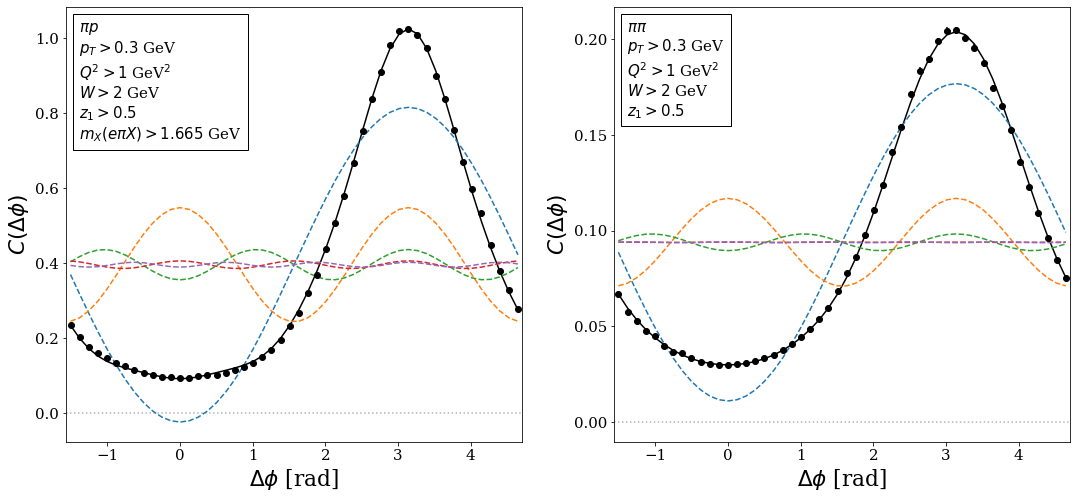

In [10]:

fig,axs = plt.subplots(1,2,figsize=(18,8))


plt.sca(axs[0])
corr1d(pi_p_mXcut,pi_p_mXcut_mixed,
              deta_range=(-0.5,2.5))
axs[0].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_1>0.5$\n$m_X(e\pi X)>1.665$ GeV",loc='upper left'))


plt.sca(axs[1])
corr1d(pi_pi,pi_pi_mixed,
              deta_range=(-0.5,2.5))
axs[1].add_artist(AnchoredText("$\pi \pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_1>0.5$",loc='upper left'))

for ax in axs:
    ax.set_ylabel("$C(\Delta\phi)$")
plt.savefig(image_dir+"/corrs_pi_p_and_pi_pi.pdf",bbox_inches='tight')
plt.show()

In [29]:
#SMC plot


def offset(a):
    return a+2*np.pi*(a<-np.pi/2)-2*np.pi*(a>=3*np.pi/2)
def dphi_deta_plot_3_proj(df,df_mixed,deta_range=(-1.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=0.003, normalizeMixedAt00=False,text=""):
    dphi_range = (-np.pi/2,3*np.pi/2)
    if fig == None:
        fig = plt.figure(figsize=(20,12))
    ax1 = fig.add_subplot(231, projection='3d')
    
    elev = 70
    azim = -112.5#-135
    ax1.view_init(azim=azim,elev = elev)
    
    denom = len(df)*2*np.pi/bins*(deta_range[1]-deta_range[0])/bins
    
    #hist1,xedges, yedges = np.histogram2d([2,2,2,2],[0,0,0,0], bins=bins,range=[deta_range, dphi_range])
    hist1, xedges, yedges = np.histogram2d(df.diff_rap_cm, offset(df.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
    hist1 = np.divide(hist1, denom)
    
    
    
    print(xedges)
    hist2, xedges, yedges = np.histogram2d(df_mixed.diff_rap_cm, offset(df_mixed.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
    for i in range(bins):
        if xedges[i+1]>0:
            break
    for j in range(bins):
        if yedges[j+1]>0:
            break;
            
    radius = .3
    if normalizeMixedAt00:
        M00 = len(df_mixed.query('sqrt(diff_rap_cm**2+diff_phi_cm**2)<%s'%radius))/(np.pi*radius**2)
        #print("M(0,0) = ", M00)
        
        hist2 = np.divide(hist2,M00*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
    else :
        hist2 = np.divide(hist2,len(df_mixed)*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
    #radius = .1
    #M00 = len(df_mixed.query('sqrt(diff_rap_cm**2+diff_phi_cm**2)<%s'%radius))/(np.pi*radius**2)
    #print("M(0,0) = ", M00)
    #radius = .5
    #M00 = len(df_mixed.query('sqrt(diff_rap_cm**2+diff_phi_cm**2)<%s'%radius))/(np.pi*radius**2)
    #print("M(0,0) = ", M00)
    
    
    
    hist3 = np.divide(hist1,np.add(hist2,0.0001))
    #hist3 *= np.greater(hist2*M00*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]),minbincontentindenom)
    
    
    
    xpos, ypos = np.meshgrid(np.add(xedges[:-1],xedges[1:])/2, np.add(yedges[:-1],yedges[1:])/2)
    zpos = 0
    #help(hist1.transpose)
    
    for i in range(len(xedges)-1):
        if(xedges[i]>projyrange[0]):
            break
    print("i=",i)
    def plot2d(ax, hist):
        ax.plot_surface(xpos.transpose()[:i+1].transpose(), ypos.transpose()[:i+1].transpose(), hist[:i+1].transpose(), cmap=viridis,edgecolor='k')
        ax.plot_surface(xpos.transpose()[i:].transpose(), ypos.transpose()[i:].transpose(), hist[i:].transpose(), cmap=autumn,edgecolor='k')
    plot2d(ax1,hist1)
    ax1.set_xlabel("$\\Delta y$")
    ax1.set_ylabel("$\\Delta\\phi$ [rad]")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_title("$S(\\Delta\\phi,\\Delta y)$",rotation=0)
    ax1.set_xlim(*deta_range)
    ax1.set_ylim(*dphi_range)
    
    
    ax2 = fig.add_subplot(232, projection='3d')
    ax2.view_init(azim=azim,elev = elev)
    #surf = ax2.plot_surface(xpos, ypos, hist2.transpose(), cmap=viridis,edgecolor='k')
    plot2d(ax2,hist2)
    ax2.set_xlabel("$\\Delta y$")
    ax2.set_ylabel("$\\Delta\\phi$ [rad]")
    ax2.zaxis.set_rotate_label(False)
    ax2.set_title("$M(\\Delta\\phi,\\Delta y)$",rotation=0)
    ax2.set_xlim(*deta_range)
    ax2.set_ylim(*dphi_range)
    
    
    
    ax3 = fig.add_subplot(233, projection='3d')
    ax3.view_init(azim=azim,elev = elev)
    #surf = ax3.plot_surface(xpos, ypos, hist3.transpose(), cmap=viridis,edgecolor='k')
    plot2d(ax3,hist3)
    ax3.set_xlabel("$\\Delta y$")
    ax3.set_ylabel("$\\Delta\\phi$ [rad]")
    ax3.zaxis.set_rotate_label(False)
    ax3.set_title("$C(\\Delta\\phi,\\Delta y)$",rotation=0)
    ax3.set_xlim(*deta_range)
    ax3.set_ylim(*dphi_range)
    
    
    bins = bins1d
    #now for 1d projections:
    ax4 = fig.add_subplot(234)
    
    denom = len(df)*2*np.pi/bins
    y, x = np.histogram(offset(df.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,denom)
    dy=np.divide(dy,denom)
    
    def plot1d(x,y,dy,ax,n=5):
        ax.errorbar(x,y,dy,marker='o',color='k',linestyle='')
        ax.axhline(0,color='0.7',linestyle=':')
        #a = [2*sum(y*np.sin(i*x))/len(x) for i in range(0,n+1)]
        #remove sin term
        #a = [0 for i in range(0,n+1)]
        b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
        b[0]/=2
        s = 0
        for i in range(0,n+1):
            s = b[i]*np.cos(i*x)+s
        ax.plot(x,s,linestyle='-',color='k',label='all')
        for i in range(1,n+1):
            ax.plot(x,b[i]*np.cos(i*x)+b[0]*(i!=0),linestyle='--', label="n=%s"%i)
        ax.set_xlim(-np.pi/2,np.pi*3/2)
    plot1d(x,y,dy,ax4)
    #ax4.add_artist(AnchoredText("$%s<\Delta y<%s$" % projyrange,loc='upper left'))
    ax4.set_xlabel("$\\Delta\\phi$ [rad]")
    ax4.set_title("$S(\\Delta\\phi)$ [$%s<\Delta y<%s$]" % projyrange,rotation=0)
    
    
    mixed_highy = df_mixed.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange)
    if(normalizeMixedAt00):
        denom = M00*2*np.pi/bins1d
    else :
        denom = len(mixed_highy)*2*np.pi/bins1d
    ym, _ = np.histogram(offset(mixed_highy.diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    dym = np.sqrt(ym)
    ym=np.divide(ym,denom)
    dym=np.divide(dym,denom)
    
    
    ax5 = fig.add_subplot(235)
    ax5.set_title("$M(\\Delta\\phi)$ [$%s<\Delta y<%s$]" % projyrange,rotation=0)
    plot1d(x,ym,dym,ax5)
    ax5.set_xlabel("$\\Delta\\phi$ [rad]")
    
    
    ax6 = fig.add_subplot(236)
    ax6.set_title("$C(\\Delta\\phi)$ [$%s<\Delta y<%s$]" % projyrange,rotation=0)
    dyc = y/ym*np.hypot(dy/y, dym/ym)
    yc= y/ym
    plot1d(x,yc,dyc,ax6)
    ax6.set_xlabel("$\\Delta\\phi$ [rad]")
    
    fig.text(-0.037,0.65,text,bbox=dict(facecolor='white', alpha=1),fontsize='large')
    return fig,[ax1,ax2,ax3,ax4, ax5, ax6]

In [30]:
# #pi p, 
# fig,axs = dphi_deta_plot_3_proj(pi_p,pi_p_mixed,
#               deta_range=(-0.5,2.5),text = "$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_1>0.4$")
# plt.savefig("../images/smc_pi_p_no_mXcut.pdf",bbox_inches='tight')
# plt.show()

In [31]:
x = [-1.5079644737231006, -1.3823007675795091, -1.2566370614359172, -1.1309733552923253, -1.0053096491487339, -0.879645943005142, -0.7539822368615503, -0.6283185307179585, -0.5026548245743668, -0.37699111843077515, -0.25132741228718336, -0.12566370614359157, 1.1102230246251565e-16, 0.1256637061435919, 0.2513274122871837, 0.3769911184307754, 0.5026548245743672, 0.6283185307179588, 0.7539822368615505, 0.8796459430051422, 1.0053096491487339, 1.1309733552923258, 1.2566370614359175, 1.3823007675795091, 1.507964473723101, 1.6336281798666927, 1.7592918860102844, 1.8849555921538763, 2.0106192982974678, 2.1362830044410597, 2.2619467105846516, 2.387610416728243, 2.513274122871835, 2.638937829015427, 2.7646015351590183, 2.8902652413026098, 3.0159289474462017, 3.1415926535897936, 3.2672563597333855, 3.392920065876977, 3.5185837720205684, 3.6442474781641603, 3.769911184307752, 3.895574890451344, 4.0212385965949355, 4.1469023027385274, 4.272566008882119, 4.39822971502571, 4.523893421169303, 4.649557127312894]
y =  [0.15929901266893673, 0.15325915016108885, 0.15025357169868994, 0.14411682986107063, 0.13993529046041586, 0.14437216589792962, 0.13981269683256653, 0.13676288210417226, 0.13307718328115842, 0.14350433094566217, 0.13591287070726307, 0.13608368016128794, 0.1383947280028515, 0.13253541278731903, 0.13631569732244717, 0.13542554252715513, 0.13672872264949634, 0.13079865798860563, 0.13695059550320324, 0.1401606607377119, 0.14635317951008583, 0.1531277201139515, 0.15415408463989924, 0.1569198595158442, 0.1564504308868026, 0.15971599848271117, 0.1591305541524958, 0.1596756146787387, 0.1616023974302267, 0.16268344005616509, 0.16353549173031462, 0.16318563919915466, 0.16329071517885801, 0.1638311403004336, 0.16273863189103627, 0.16431270126280598, 0.16527993247963763, 0.16214719558955468, 0.1641306808915243, 0.16464813544048806, 0.1609658812363636, 0.16116602418517945, 0.16091517731288965, 0.1583760538716385, 0.15792632771750312, 0.15912063231469928, 0.1564334848502593, 0.15575072355951558, 0.15654186200565665, 0.1581939580587368]
dy =  [0.0010475079471768927, 0.0011191598146020807, 0.001229347350162082, 0.0012728144924604545, 0.00139590129884889, 0.0014982875694411002, 0.0015175571457279014, 0.0016065007169677908, 0.0016669282562240715, 0.0017213975250915967, 0.001717882074989446, 0.0018030747728392223, 0.0017841893390081612, 0.0017925818292371834, 0.0017244046972418894, 0.0017189764318866333, 0.001663738657311362, 0.0016034148117409072, 0.001521747290095177, 0.0014574605679535308, 0.0013809141909264424, 0.0012896797763685196, 0.0012161153684977903, 0.0011230264194699796, 0.0010309561873843162, 0.0009566964922078314, 0.0008650880956863721, 0.0007976458966391162, 0.0007283760356607391, 0.0006673296912036946, 0.0006150151334941163, 0.0005664555582819027, 0.0005231766512034006, 0.00048680617718035134, 0.0004570108886661513, 0.0004381962951408671, 0.00042660983914154097, 0.0004238114885389379, 0.0004260759806865036, 0.00043908628057310565, 0.00045929566918917947, 0.00048477386688888113, 0.0005207621249666287, 0.0005681616437182421, 0.0006063124722900621, 0.0006674392452297636, 0.0007323852675392596, 0.0008009013981660864, 0.0008782699340936815, 0.0009515627261493195]
y = pd.Series(y)/(2*np.pi*np.mean(y))
pi_p_M_from_mc = x,y,dy

x = [-1.5079644737231006, -1.3823007675795091, -1.2566370614359172, -1.1309733552923253, -1.0053096491487339, -0.879645943005142, -0.7539822368615503, -0.6283185307179585, -0.5026548245743668, -0.37699111843077515, -0.25132741228718336, -0.12566370614359157, 1.1102230246251565e-16, 0.1256637061435919, 0.2513274122871837, 0.3769911184307754, 0.5026548245743672, 0.6283185307179588, 0.7539822368615505, 0.8796459430051422, 1.0053096491487339, 1.1309733552923258, 1.2566370614359175, 1.3823007675795091, 1.507964473723101, 1.6336281798666927, 1.7592918860102844, 1.8849555921538763, 2.0106192982974678, 2.1362830044410597, 2.2619467105846516, 2.387610416728243, 2.513274122871835, 2.638937829015427, 2.7646015351590183, 2.8902652413026098, 3.0159289474462017, 3.1415926535897936, 3.2672563597333855, 3.392920065876977, 3.5185837720205684, 3.6442474781641603, 3.769911184307752, 3.895574890451344, 4.0212385965949355, 4.1469023027385274, 4.272566008882119, 4.39822971502571, 4.523893421169303, 4.649557127312894]
y =  [0.16474705297811426, 0.16723314904076708, 0.17293961072183764, 0.1729977646188746, 0.1728234119762079, 0.1653406565274398, 0.17509635862620324, 0.17642214505524748, 0.17784008307247628, 0.1719940354551126, 0.18171693700173724, 0.17419721800764476, 0.1703661837716142, 0.16932960166382763, 0.15601180200989107, 0.16861933618363137, 0.17139368979898403, 0.1694950180469651, 0.1764737287807759, 0.17377414421521836, 0.18258582769146697, 0.1672521083855356, 0.16203825076587883, 0.17465066676286364, 0.17347668623284165, 0.16312140637776382, 0.16408621347295788, 0.15751589839569832, 0.15971081904151715, 0.16124614021728378, 0.15773850855702862, 0.15218185064370873, 0.15433863331501838, 0.15518715699708469, 0.15381641974282392, 0.15476014700448076, 0.15678399856485195, 0.15225808244126388, 0.15671770950411437, 0.15598636522677195, 0.15293955453537722, 0.15310129222999033, 0.15853888926960205, 0.15177623835073317, 0.1553109501962727, 0.154207491290852, 0.1621729783875286, 0.16037668784756795, 0.15885057296661698, 0.1571023695020797]
dy =  [0.0009823792519533543, 0.0010594091425679651, 0.0010982109286583439, 0.0011541377813419017, 0.001219139557253785, 0.0012831073228713743, 0.001323269469231194, 0.00141641458423603, 0.0013919799391966623, 0.0014751238121518252, 0.0014590658069113637, 0.0015172285514313984, 0.0015249787700972227, 0.0015513515961769868, 0.0015515908430267869, 0.0014980694196177478, 0.001443994244996182, 0.0013874717209846864, 0.0013311995002294665, 0.0012963255352506015, 0.0011983935787678855, 0.0011803329075751798, 0.0011178489333786537, 0.001035475708361777, 0.000984436720178767, 0.0009356376574456441, 0.0008854931101059405, 0.0008493161751884011, 0.0007932742616147465, 0.0007491895711224059, 0.0007151768647235258, 0.0006935519378418456, 0.0006615408293662916, 0.000634102537467777, 0.0006175613414620417, 0.0006066978110861424, 0.0006019743277408028, 0.0006000878914083357, 0.0006011722667255409, 0.0006092209125366286, 0.0006222270020343208, 0.0006391824680597545, 0.0006613456715681697, 0.0006965646332504593, 0.0007213280009042975, 0.0007622499406978418, 0.0007879775749029597, 0.0008285081116167409, 0.0008913931347883546, 0.0009471484835402862]
y = pd.Series(y)/(2*np.pi*np.mean(y))
pi_pi_M_from_mc = x,y,dy


[-0.5  -0.35 -0.2  -0.05  0.1   0.25  0.4   0.55  0.7   0.85  1.    1.15
  1.3   1.45  1.6   1.75  1.9   2.05  2.2   2.35  2.5 ]
i= 14


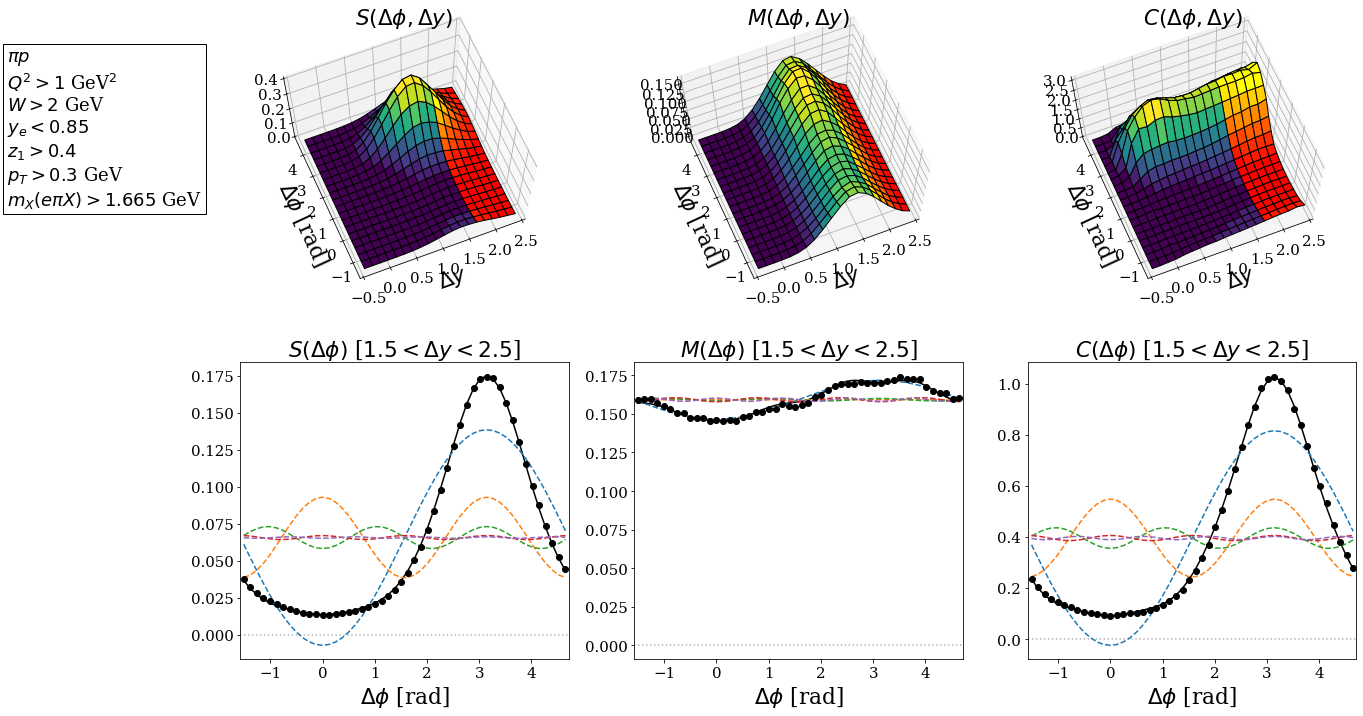

[-0.5  -0.35 -0.2  -0.05  0.1   0.25  0.4   0.55  0.7   0.85  1.    1.15
  1.3   1.45  1.6   1.75  1.9   2.05  2.2   2.35  2.5 ]
i= 14


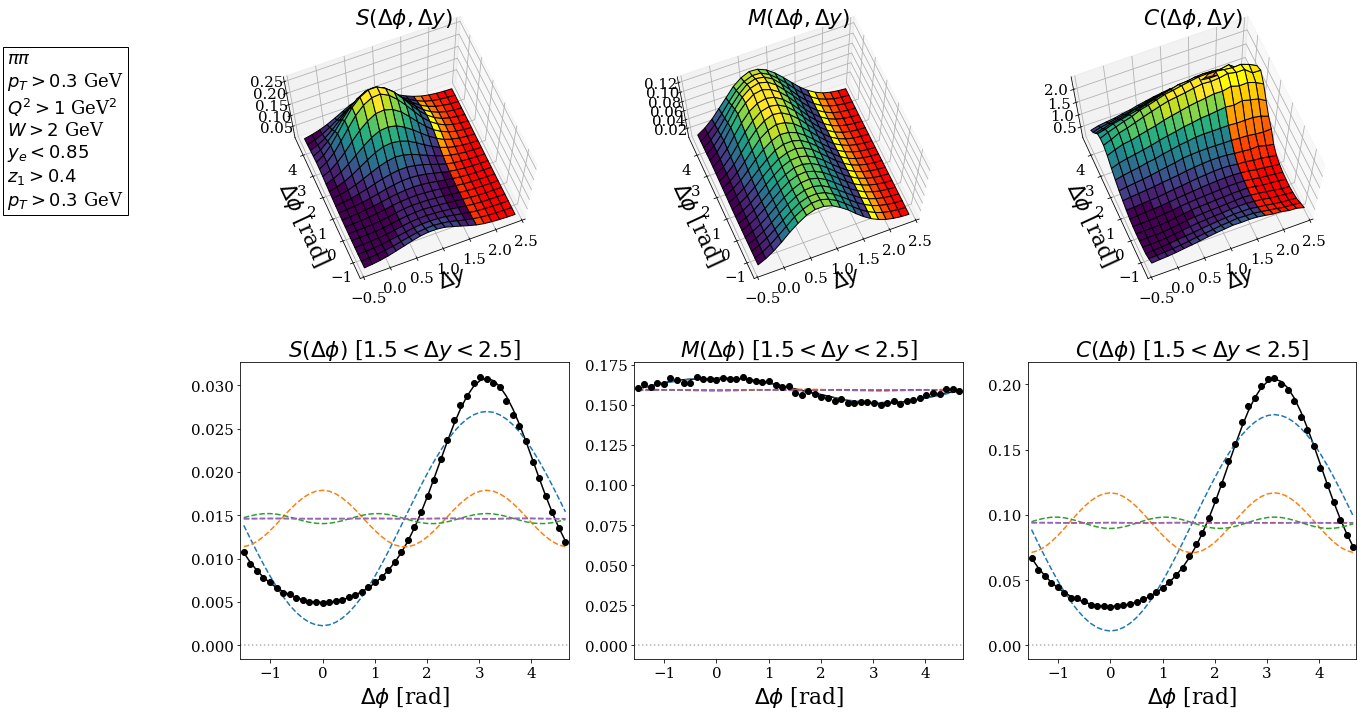

In [32]:
#pi p, mX cut
gc.collect()
fig,axs = dphi_deta_plot_3_proj(pi_p_mXcut,pi_p_mXcut_mixed,
              deta_range=(-0.5,2.5),text="$\pi p$\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$y_e<0.85$\n$z_1>0.4$\n$p_T>0.3$ GeV\n$m_X(e\pi X) > 1.665$ GeV")
#axs[4].errorbar(*pi_p_M_from_mc,color='g',marker='o') 
#axs[4].text(-0.5,0.027,"correction from event mixing",fontsize=18,color='k')
#axs[4].text(-0.5,0.01,"alt. correction from MC",fontsize=18,color='g') 
plt.savefig(image_dir + "/smc_pi_p.pdf",bbox_inches='tight')
plt.show()
gc.collect()

#pi pi (either charge)

fig,axs = dphi_deta_plot_3_proj(pi_pi,pi_pi_mixed,
              deta_range=(-0.5,2.5),text="$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$y_e<0.85$\n$z_{1}>0.4$\n$p_T>0.3$ GeV")
#axs[4].errorbar(*pi_pi_M_from_mc,color='g',marker='o') 
#axs[4].text(-0.5,0.027,"correction from event mixing",fontsize=18,color='k')
#axs[4].text(-0.5,0.01,"alt. correction from MC",fontsize=18,color='g') 
plt.savefig(image_dir + "/smc_pi_pi.pdf",bbox_inches='tight')
plt.show()


# Helicity asymmetries

In [23]:
#obtains the 1d asymmetry function.  Does not plot it.  
def asym1d(df,bins=25,scale=1):
    yp,x = np.histogram(df.query('helicity>0').diff_phi_cm,bins=bins, range=(-np.pi,np.pi))
    ym,x = np.histogram(df.query('helicity<0').diff_phi_cm,bins=bins, range=(-np.pi,np.pi))
    x = pd.Series([(x[i] + x[i+1])/2 for i in range(len(x)-1)])

    tot = yp+ym
    a = (yp-ym)*scale/(tot+(tot==0)*1)
    da = (np.sqrt((1-a**2)/(tot+(tot==0)*1))+(tot==0)*1)*scale
    return x,a,da



from scipy.optimize import curve_fit

def sin2phifit(x,y,dy):
    def f (xx,a0,b1,b2):
        return a0+b1*np.sin(xx)+b2*np.sin(2*xx)
    p,cov = curve_fit(f, x, y,sigma=dy)
    return p,cov
def altfit(x,y,dy):
    def f (xx,a0,b1,b2):
        return a0+b1*np.sin(xx)/(1+b2*np.cos(xx))
    p,cov = curve_fit(f, x, y,sigma=dy)
    return p,cov

def asym2d(df,bins=25,scale=1,yrange=(0, 2.5)):
    dfp = df.query('helicity>0')
    yp, xedges, yedges = np.histogram2d(dfp.diff_rap_cm,dfp.diff_phi_cm,bins=bins, range=[yrange,(-np.pi,np.pi)])
    dfm = df.query('helicity<0')
    ym, xedges, yedges = np.histogram2d(dfm.diff_rap_cm,dfm.diff_phi_cm,bins=bins, range=[yrange,(-np.pi,np.pi)])
    
    tot = yp+ym
    a = (yp-ym)*scale/tot
    da = np.sqrt((1-a**2)/tot)*scale
    xpos, ypos = np.meshgrid(np.add(xedges[:-1],xedges[1:])/2, np.add(yedges[:-1],yedges[1:])/2)
    return xpos,ypos,a,da

def plotasym2d(xpos,ypos,a,min_highlight=1.5,zrange=0.03,label="",scale=1, ax1=None):
    if ax1 is None:
        fig = plt.figure(figsize=(8,8))
        ax1 = fig.add_subplot(111, projection='3d')
    elev = 70
    azim = -112.5#-135
    ax1.view_init(azim=azim,elev = elev)
    #for i in range(len(xpos[0])-1):
    #    if(xpos[0][i]>min_highlight):
    #        break
    #ax1.plot_surface(xpos.transpose()[:i+1].transpose(), ypos.transpose()[:i+1].transpose(), a[:i+1].transpose(), cmap=viridis,edgecolor='k')
    #ax1.plot_surface(xpos.transpose()[i:].transpose(), ypos.transpose()[i:].transpose(), a[i:].transpose(), cmap=autumn,edgecolor='k')
    
    
    #a = a*((a>-zrange)&(a<zrange))-(a<-zrange)*zrange+(a>zrange)*zrange
    ax1.plot_surface(xpos.transpose().transpose(), ypos.transpose().transpose(), 
                     a.transpose(), cmap=piyg,edgecolor='k',vmin=-zrange,vmax=zrange)
    
    ax1.set_xlabel("$\\Delta y$",fontsize='large')
    ax1.set_ylabel("$\\Delta\\phi$ [rad]",fontsize='large')
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlim(-zrange,zrange)
    ax1.set_title("$A_{%s}(\\Delta\\phi,\\Delta y)$" % label,rotation=0)

<ipython-input-25-3b0dd157f157>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


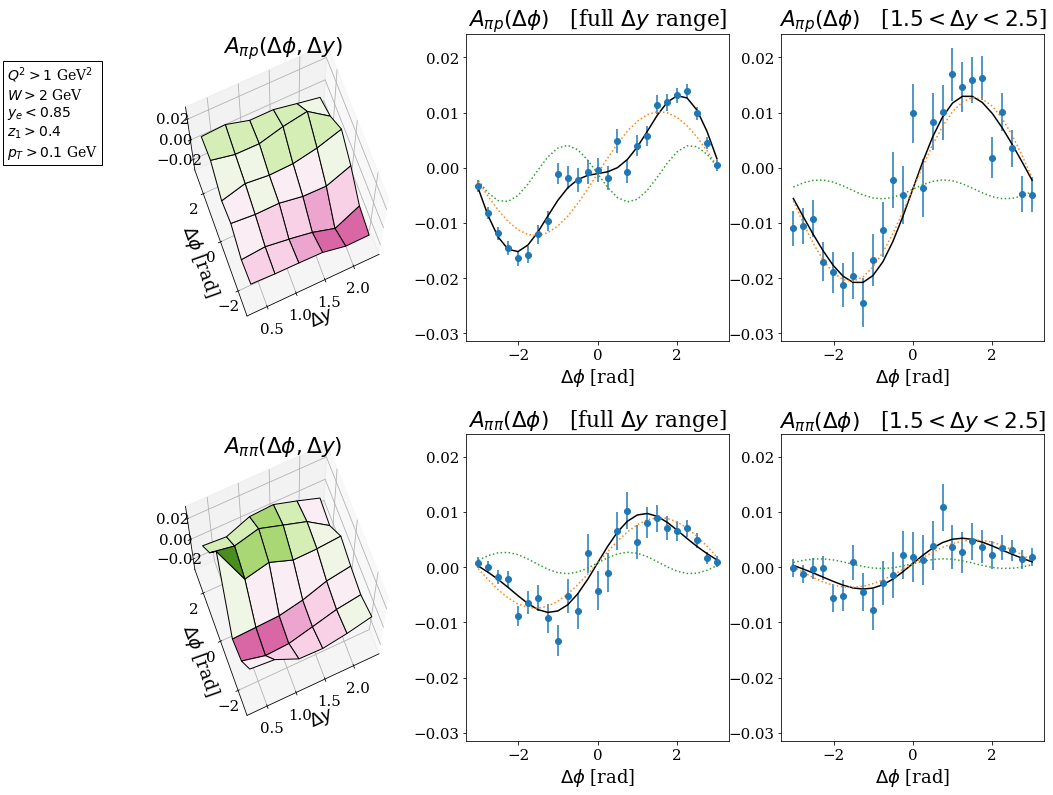

In [25]:
#create multipanel helicity plot
dfs = [data_dihadrons.query('h1_cm_pt > 0.1 and h2_cm_pt > 0.1').query(q) for q in 'abs(h2_pid)==211 h2_pid==2212'.split()]

fig = plt.figure(figsize=(16,13))
fig.subplots_adjust(hspace=0.3)
args = dict(yrange=(0.1,2.5),bins=6,scale=1/.863)
xpos,ypos,a,da= asym2d(dfs[0],
                       **args)
plotasym2d(xpos,ypos,a,min_highlight=10,zrange=0.03, label ="\pi p",ax1=fig.add_subplot(231, projection='3d'))

xpos,ypos,a,da= asym2d(dfs[1],
                       **args)
plotasym2d(xpos,ypos,a,min_highlight=10,zrange=0.03, label ="\pi\pi",ax1=fig.add_subplot(234, projection='3d'))

def tmp(ax,df,l1,l2):
    x,a,da= asym1d(df,scale=1/.863)
    ax.errorbar(x,a, da, linestyle='',label='$\pi p$',marker='o')
    (p0,p1,p2),cov = sin2phifit(x,a,da)
    ax.set_title("$A_{%s}(\\Delta\phi)$   [%s]" %(l1,l2))
    ax.plot(x,p0+p1*np.sin(x)+p2*np.sin(2*x),linestyle='-',color='k')
    ax.plot(x,p0+p1*np.sin(x),linestyle=':')
    ax.plot(x,p0+p2*np.sin(2*x),linestyle=':')
    ax.set_xlabel("$\\Delta\\phi$ [rad]",fontsize='large')
    #ax.axhline(0,color='0.7',linestyle=':')

ax2=fig.add_subplot(232)
tmp(ax2,dfs[0],"\pi p","full $\\Delta y$ range")

ax3=fig.add_subplot(233, sharey = ax2)
tmp(ax3,dfs[0].query("diff_rap_cm>1.5 and diff_rap_cm<2.5"),"\\pi p","$1.5<\\Delta y<2.5$")

ax5=fig.add_subplot(235, sharey = ax2)
tmp(ax5,dfs[1],"\pi\pi","full $\\Delta y$ range")

ax6=fig.add_subplot(236, sharey = ax2)
tmp(ax6,dfs[1].query("diff_rap_cm>1.5 and diff_rap_cm<2.5"),"\\pi\\pi","$1.5<\\Delta y<2.5$")

fig.subplots_adjust(hspace=0.3)

fig.text(0,0.75,"$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$y_e<0.85$\n$z_1>0.4$\n$p_T>0.1$ GeV",
         bbox=dict(facecolor='white', alpha=1),fontsize=14)

fig.savefig("../images/helicity.pdf",bbox_inches='tight')
fig.show()

In [14]:
def offset(a):
    return a+2*np.pi*(a<-np.pi/2)-2*np.pi*(a>=3*np.pi/2)
def get_v2(df,df_mixed,projyrange=(1.5,2.5),bins=50, useMixed=True):
    import scipy.optimize
    #radius = 0.3
    #M00 = len(df_mixed.query('sqrt(diff_rap_cm**2+diff_phi_cm**2)<%s'%radius))/(np.pi*radius**2)
    
    denom = len(df)*2*np.pi/bins
    y, x = np.histogram(offset(df.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,denom)
    dy=np.divide(dy,denom)
    
    if useMixed:
        mixed_highy = df_mixed.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange)
        denom = len(df_mixed)*2*np.pi/bins
        ym, _ = np.histogram(offset(mixed_highy.diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
        dym = np.sqrt(ym)
        ym=np.divide(ym,denom)
        dym=np.divide(dym,denom)

        dyc = y/(ym+.001)*np.hypot(dy/(y+0.001), dym/(ym+0.001))
        dyc = dyc*(dyc<1) + (dyc>=1)
        yc= y/(ym+.001)
    
    else :
        yc = y
        dyc = dy
        
    #b2 = 2*sum(y*np.cos(2*x))/len(x)
    #b0 = sum(y)/len(x)
    
    n=5
    if n==3:
        def f (xx,b0,b1,b2,b3):
            args=[b0,b1,b2,b3]
            tot = 0
            for i in range(len(args)):
                tot+=args[i]*np.cos(i*xx)
            return tot

    if n==4:
        def f (xx,b0,b1,b2,b3,b4):
            args=[b0,b1,b2,b3,b4]
            tot = 0
            for i in range(len(args)):
                tot+=args[i]*np.cos(i*xx)
            return tot
    if n==5:
        def f (xx,b0,b1,b2,b3,b4,b5):
            args=[b0,b1,b2,b3,b4,b5]
            tot = 0
            for i in range(len(args)):
                tot+=args[i]*np.cos(i*xx)
            return tot
    b,bcov = scipy.optimize.curve_fit(f, x, yc,sigma=dyc)
    
    
    
    return b[2]/b[0]/2, b[2]/b[0]*np.sqrt(bcov[0][0]/b[0]**2+bcov[2][2]/b[2]**2)/2
    

In [15]:
def v2_plot(df,df_mixed, xvar, mn,mx,bins,label=None,useMixed=True):
    x = []
    y = []
    dy = []
    for i in range(bins):
        q = "%s >= %s and %s < %s" % (xvar,mn+i*(mx-mn)/bins,xvar,mn+(i+1)*(mx-mn)/bins)
        s = df.query(q)
        m = df_mixed.query(q)
        if(len(s) == 0 or len(m) == 0):
            continue
        yi,dyi = get_v2(s,m,useMixed=useMixed)
        import math
        if math.isnan(yi) or math.isnan(dyi) or dyi == 0 or yi==1 or abs(dyi)>0.7:
            continue
        x.append(mn+(i+0.5)*(mx-mn)/bins)
        y.append(yi)
        dy.append(dyi)
        
    plt.errorbar(x,y,dy,label=label,linestyle='-',color=None if useMixed else '0.7')
    gc.collect()
    


In [53]:
mixed.columns

Index(['E', 'Q2', 'W', 'diff_phi_cm', 'diff_phi_lab', 'diff_rap_cm', 'dtime',
       'dtime_corr', 'dvz', 'e_p', 'e_ph', 'e_px', 'e_py', 'e_pz', 'e_th',
       'h1_DC1x', 'h1_DC1y', 'h1_DC2x', 'h1_DC2y', 'h1_DC3x', 'h1_DC3y',
       'h1_chi2pid', 'h1_cm_eta', 'h1_cm_p', 'h1_cm_ph', 'h1_cm_pt',
       'h1_cm_rap', 'h1_cm_th', 'h1_cm_zeta', 'h1_eta', 'h1_p', 'h1_ph',
       'h1_pid', 'h1_px', 'h1_py', 'h1_pz', 'h1_th', 'h1_z', 'h2_DC1x',
       'h2_DC1y', 'h2_DC2x', 'h2_DC2y', 'h2_DC3x', 'h2_DC3y', 'h2_chi2pid',
       'h2_cm_ph', 'h2_cm_pt', 'h2_cm_rap', 'h2_cm_zeta', 'h2_eta', 'h2_p',
       'h2_ph', 'h2_pid', 'h2_px', 'h2_py', 'h2_pz', 'h2_th', 'h2_z',
       'helicity', 'missing_mass', 'mixevt_E', 'mixevt_Q2', 'mixevt_W',
       'mixevt_e_p', 'mixevt_e_ph', 'mixevt_e_px', 'mixevt_e_py',
       'mixevt_e_pz', 'mixevt_e_th', 'mixevt_helicity', 'mixevt_nskipped',
       'mixevt_nu', 'mixevt_q_th', 'mixevt_x', 'mixevt_y', 'mx_eh1h2x',
       'mx_eh1x', 'mx_eh2x', 'nelectrons', 'nhtracks'

/home/sebouh/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:755: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/home/sebouh/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/sebouh/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:487: RuntimeWarning: invalid value encountered in multiply
  return transform * (func(xdata, *params) - ydata)


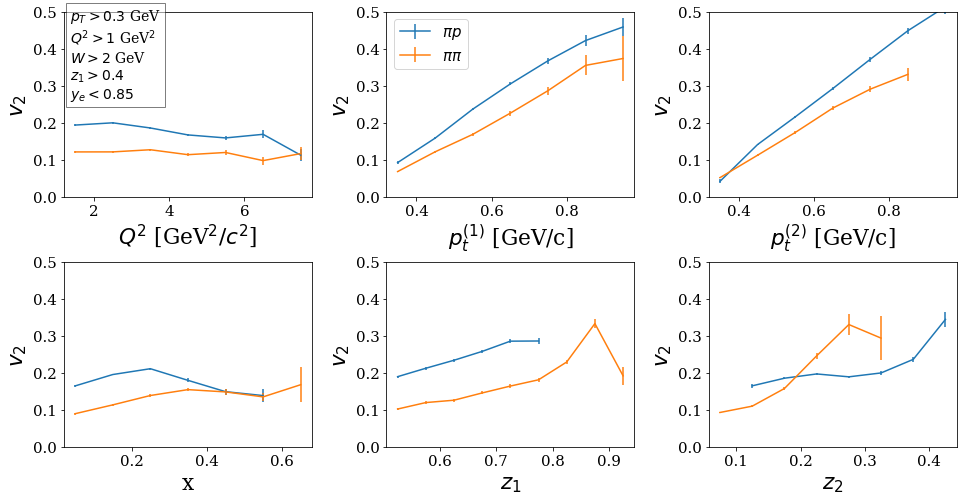

In [54]:
#v2 plots for presentation
dfs = [pi_p_mXcut,pi_pi]
dfs_mixed = [pi_p_mXcut_mixed, pi_pi_mixed]
labels = '$\pi p$;$\pi\pi$'.split(";")
#for q in "h2_pid == 2212 and abs(h1_pid) == 211","abs(h2_pid) == 211 and abs(h1_pid) == 211":
#    dfs.append(data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#                             + " and " + q))
#    
#    dfs_mixed.append(mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#                             + " and " + q))

fig, axs = plt.subplots(2,3, figsize=(16,8))    
fig.subplots_adjust(hspace=0.35,wspace=0.3)

plt.sca(axs[1][1])    
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h1_z', 0.5, 1, 10,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$z_1$")


plt.sca(axs[1][2]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h2_z', 0, 0.5, 10,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$z_2$")


plt.sca(axs[0][1]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h1_cm_pt', 0, 1, 10,label=label)
plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$p_t^{(1)}$ [GeV/c]")


plt.sca(axs[0][2]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h2_cm_pt', 0, 1, 10,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$p_t^{(2)}$ [GeV/c]")


plt.sca(axs[1][0]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'x', 0, 1, 10,label=label)
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("x")

plt.sca(axs[0][0]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'Q2', 1, 10, 9,label=label)
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$Q^2$ [GeV$^2/c^2$]")

for a in axs:
    for b in a:
        b.set_ylim(0,0.5)
        
fig.text(0.13,0.73,"$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_1>0.4$\n$y_e<0.85$",bbox=dict(facecolor='white', alpha=0.5),fontsize=14)
plt.savefig(image_dir+"/v2_vs_stuff1.pdf",bbox_inches='tight')

/home/sebouh/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:755: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/home/sebouh/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/sebouh/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:487: RuntimeWarning: invalid value encountered in multiply
  return transform * (func(xdata, *params) - ydata)


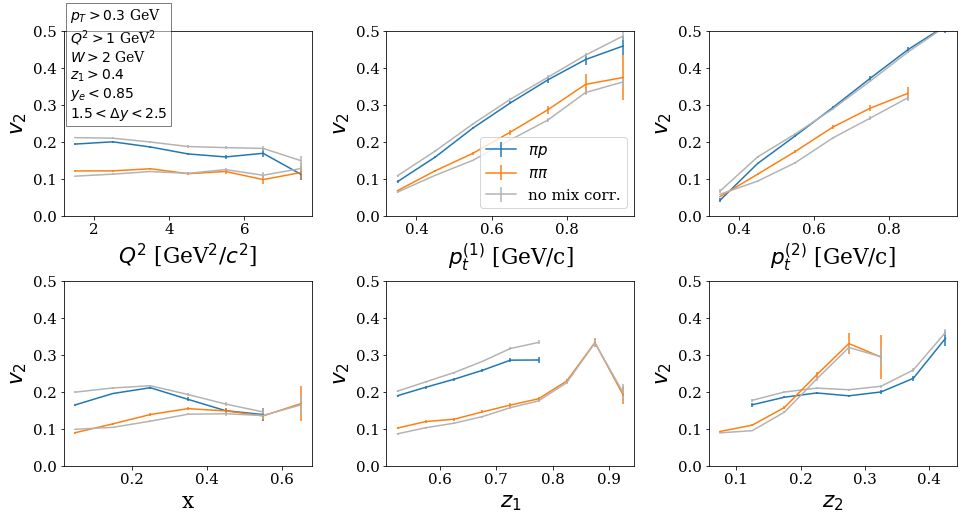

In [12]:
#v2 plots for presentation
dfs = [pi_p_mXcut,pi_pi]
dfs_mixed = [pi_p_mXcut_mixed, pi_pi_mixed]
labels = '$\pi p$;$\pi\pi$'.split(";")
#for q in "h2_pid == 2212 and abs(h1_pid) == 211","abs(h2_pid) == 211 and abs(h1_pid) == 211":
#    dfs.append(data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#                             + " and " + q))
#    
#    dfs_mixed.append(mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#                             + " and " + q))

fig, axs = plt.subplots(2,3, figsize=(16,8))    
fig.subplots_adjust(hspace=0.35,wspace=0.3)

plt.sca(axs[1][1])    
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h1_z', 0.5, 1, 10,label=label)
    v2_plot(df,df_mixed, 'h1_z', 0.5, 1, 10,useMixed=False)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$z_1$")


plt.sca(axs[1][2]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h2_z', 0, 0.5, 10,label=label)
    v2_plot(df,df_mixed, 'h2_z', 0, 0.5, 10,useMixed=False)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$z_2$")


plt.sca(axs[0][1]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h1_cm_pt', 0, 1, 10,label=label)
    v2_plot(df,df_mixed, 'h1_cm_pt', 0, 1, 10,useMixed=False,label='no mix corr.' if label==labels[-1] else None)
plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$p_t^{(1)}$ [GeV/c]")


plt.sca(axs[0][2]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h2_cm_pt', 0, 1, 10,label=label)
    v2_plot(df,df_mixed, 'h2_cm_pt', 0, 1, 10,useMixed=False)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$p_t^{(2)}$ [GeV/c]")


plt.sca(axs[1][0]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'x', 0, 1, 10,label=label)
    v2_plot(df,df_mixed, 'x', 0, 1, 10,useMixed=False)
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("x")

plt.sca(axs[0][0]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'Q2', 1, 10, 9,label=label)
    v2_plot(df,df_mixed, 'Q2', 1, 10, 9,useMixed=False)
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$Q^2$ [GeV$^2/c^2$]")

for a in axs:
    for b in a:
        b.set_ylim(0,0.5)
        
fig.text(0.13,0.73,"$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_1>0.4$\n$y_e<0.85$\n$1.5<\Delta y<2.5$",bbox=dict(facecolor='white', alpha=0.5),fontsize=14)
plt.savefig(image_dir+"/v2_vs_stuff1_mix.pdf",bbox_inches='tight')

In [ ]:
dfs = []
dfs_mixed = []
labels = '$\pi p$;$\pi^+ p$;$\pi^- p$;$\pi\pi$'.split(";")
for q in "h2_pid == 2212 and abs(h1_pid) == 211","h2_pid == 2212 and h1_pid == 211","h2_pid == 2212 and h1_pid == -211","abs(h2_pid) == 211 and abs(h1_pid) == 211":
    dfs.append(data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                             + " and " + q))
    
    dfs_mixed.append(mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                             + " and " + q))

fig, axs = plt.subplots(2,2, figsize=(12,8))    
fig.subplots_adjust(hspace=0.3)

plt.sca(axs[0][0])    
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h1_z', 0.5, 1, 10,label=label)
plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$z_1$")


plt.sca(axs[0][1]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h2_z', 0, 0.5, 10,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$z_2$")


plt.sca(axs[1][0]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h1_cm_pt', 0, 1, 10,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$p_t^{(1)}$ [GeV/c]")


plt.sca(axs[1][1]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'h2_cm_pt', 0, 1, 10,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$p_t^{(2)}$ [GeV/c]")

for a in axs:
    for b in a:
        b.set_ylim(0,1.2)
plt.savefig("../images/v2_vs_stuff2.pdf")

fig, axs = plt.subplots(2,2, figsize=(12,8))      
fig.subplots_adjust(hspace=0.3)  
plt.sca(axs[0][0]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'x', 0, 1, 10,label=label)
plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("x")



plt.sca(axs[0][1]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'W', 2, 4, 10,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$W$ [GeV$/c^2$]")

plt.sca(axs[1][0]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'Q2', 1, 10, 9,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$Q^2$ [GeV$^2/c^2$]")

plt.sca(axs[1][1]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'mx_eh1x', 1, 3.5, 10,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$m_X(eh_1 X)$")


for a in axs:
    for b in a:
        b.set_ylim(0,1.2)
plt.savefig("../images/v2_vs_stuff3.pdf")
plt.show()


fig, axs = plt.subplots(2,2, figsize=(12,8))    
fig.subplots_adjust(hspace=0.3)    
plt.sca(axs[0][0]) 

for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'nhtracks', 1.5, 7.5, 6,label=label)
plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("# of hadron tracks")


plt.sca(axs[0][1]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'pair_mass', 0, 6, 20,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("pair mass [GeV$/c^2$]")

plt.sca(axs[1][0]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'diff_rap_cm', 1.5, 2.5, 10,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$\Delta y$")


plt.sca(axs[1][1]) 
for df,df_mixed,label in zip(dfs,dfs_mixed,labels):
    v2_plot(df,df_mixed, 'mx_eh1h2x', 0, 6, 20,label=label)
#plt.legend()
plt.gca().set_ylabel("$v_2$")
plt.gca().set_xlabel("$m_X(eh_1h_2 X)$ [GeV$/c^2$]")


for a in axs:
    for b in a:
        b.set_ylim(0,1.2)
plt.savefig("../images/v2_vs_stuff4.pdf")
plt.show()

In [9]:
import scipy.optimize,numpy.random,time,os
def upper_limit_yridge(df,df_mixed,n=3,bins = 100,miniterations=100,maxiterations=200000,fitrange=(0,np.pi),
                       progressPrintInterval=None, #print stats after every [...] iterations (don't print if 0)
                       sayDone=False,projyrange=(1.5,2.5),thresh = 1e-7):
    if len(df) == 0:
        return 1, 1.0, 0,0,[]
    start = time.perf_counter()
    import scipy.optimize
    #radius = 0.3
    #M00 = len(df_mixed.query('sqrt(diff_rap_cm**2+diff_phi_cm**2)<%s'%radius))/(np.pi*radius**2)
    
    #denom = 2*np.pi/bins
    ys, x = np.histogram(np.abs(df.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange).diff_phi_cm), bins=bins, range=(0,np.pi))
    x = np.add(x[1:],x[:-1])/2
    dys = np.sqrt(ys)
    denom = sum(ys)*(x[1]-x[0])
    ys=np.divide(ys,denom)
    dys=np.divide(dys,denom)
    
    
    mixed_highy = df_mixed.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange)
    
    ym, _ = np.histogram(np.abs(mixed_highy.diff_phi_cm), bins=bins, range=(0,np.pi))
    dym = np.sqrt(ym)
    denom = sum(ym)*(x[1]-x[0])
    ym=np.divide(ym,denom)
    dym=np.divide(dym,denom)
    
    dyc = ys/(ym+.0001)*np.hypot(dys/(ys+0.0001), dym/(ym+0.0001))
    dyc = dyc*(dyc<1) + (dyc>=1)
    yc= ys/(ym+.0001)
    
    
    x = pd.Series(x)
    y = pd.Series(yc)
    dy = pd.Series(dyc)
    w = 1/dy**2
    yields=[]
    nonzeroyields=0
    for ii in range(maxiterations):
        yrand = y+numpy.random.randn(len(dy))*dy*(dy<999)
        #print((yrand-y)/dy)
        if n==3:
            def f (xx,b0,b1,b2,b3):
                args=[b0,b1,b2,b3]
                tot = 0
                for i in range(len(args)):
                    tot+=args[i]*np.cos(i*xx)
                return tot
        
        if n==4:
            def f (xx,b0,b1,b2,b3,b4):
                args=[b0,b1,b2,b3,b4]
                tot = 0
                for i in range(len(args)):
                    tot+=args[i]*np.cos(i*xx)
                return tot
        if n==5:
            def f (xx,b0,b1,b2,b3,b4,b5):
                args=[b0,b1,b2,b3,b4,b5]
                tot = 0
                for i in range(len(args)):
                    tot+=args[i]*np.cos(i*xx)
                return tot
        b,bcov = scipy.optimize.curve_fit(f, x, yrand,sigma=1/np.sqrt(w))
        
        #don't waste your time if f''[0] is positive
        fpp0= sum([-i*i*b[i] for i in range(len(b))])
        #print(fpp0)
        if fpp0 < 0:  
            s = 0
            for i in range(0,n+1):
                s = b[i]*np.cos(i*x)+s

            smin = max(s)

            xmin=fitrange[0]
            for xi,si in zip(x,s):
                if(xi<fitrange[0]):
                    continue
                if(si<smin):
                    xmin = xi
                    smin = si
            integral = 0
            dx = x[1]-x[0]
            for xi,yi in zip(x,yrand):
                if(xi<xmin):
                    integral+=(yi-smin)*dx
                else:
                    break
            yeild = integral
            yeild /= sum(y)*dx
            yields.append(yeild)
            nonzeroyields+=1
        else :
            yields.append(0)
        durationsofar = time.perf_counter()-start;
        if progressPrintInterval:
            if ii%progressPrintInterval == 0:
                print("iter ", ii, "; average so far: ", durationsofar/(ii+1), 
                    ";   time so far: ",durationsofar//3600,"hours", (durationsofar//60)%60, "minutes", int(durationsofar % 60), "seconds")
        if ii == miniterations and nonzeroyields == 0:
            break
            
    duration = time.perf_counter()-start;
    print("total time: ",int(duration//3600),"hours", int((duration//60)%60), "minutes", int(duration % 60), "seconds")
    if sayDone:
        os.system('say "done"')    
    yields = pd.Series(yields)
    
    UL = yields.quantile(.95)
    CL = .95
    median = yields.median()
    LL = yields.quantile(.05)
    
    if UL <thresh:
        UL = thresh
        CL = len(yields[yields<thresh])/len(yields)
        median = 0
        LL = 0
    return UL, CL,median,LL,yields

In [75]:
def exclusion_plot(df,df_mixed,expr, mn=None,mx=None,bins=None,partitions=None,showMedians=True,showLL=True,alpha=1,
                   offset=0,label='',fillstyle='full',color=None, miniterations=1000, plotYields=False,thresh=1e-8):
    
    #for pid,pm,shift,color in (211,"+",-offset/2,'r'),(-211,'-',offset/2,'k'):
    x,ul,cl,medians,ll=[],[],[],[],[]
    if mn != None and mx != None and bins != None:
        mins = [mn +i*(mx-mn)/bins for i in range(bins)]
        maxs = [mn +(i+1)*(mx-mn)/bins for i in range(bins)]
        shift = offset*(mx-mn)/bins
    elif partitions != None:
        mins = partitions[:-1]
        maxs = partitions[1:]
        shift = offset
    else:
        print("either use the partitions argument or the mn, mx and bins arguments")
    allYields = []
    import multiprocessing
    manager = multiprocessing.Manager()
    x = manager.list([0]*len(mins))
    ul = manager.list([0]*len(mins))
    cl = manager.list([0]*len(mins))
    ll = manager.list([0]*len(mins))
    medians = manager.list([0]*len(mins))
    allYields = manager.list([[]]*len(mins))
    def f(mni,mxi,i,lock=None,):
        q = "%s >= %s and %s < %s" %(expr, mni, expr, mxi)
        dfbin = df.query(q)
        if expr == 'nhtracks':
            #binning on the mixed events makes no sense for nhtracks
            dfbin_mix = df_mixed
        else:
            dfbin_mix = df_mixed.query(q)
        a = upper_limit_yridge(dfbin,dfbin_mix,miniterations=miniterations,maxiterations=miniterations,n=5,bins=50,fitrange=(0,np.pi),thresh=thresh)
        if len(a) != 5:
            print(a)
        UL,CL,median,LL,yields =a
        if UL > 1:
            return
        xmean = np.mean(dfbin.eval(expr))*(1+shift)
        print(xmean,UL,CL,median,LL,len(dfbin),len(dfbin_mix))
        
        #avoid allowing more than one thread to append these values simultaneously
        if lock!= None:
            lock.acquire()
        try:
            x[i] = xmean
            ul[i] = UL
            cl[i] = CL
            medians[i] = median
            ll[i] = LL
            allYields[i] = yields
            #print("x is ",x)
        finally:
            if lock != None:
                lock.release()
    processes = []
    lock = multiprocessing.Lock()
    for i,(mni, mxi) in enumerate(zip(mins,maxs)):
        p = multiprocessing.Process(target=f, args=(mni, mxi,i,lock))
        processes.append(p)
        p.start()
    for process in processes:
        process.join()
    print("x is " + str(x))
    x = pd.Series([x[i] for i in range(len(x))])
    y =  pd.Series([medians[i] for i in range(len(x))])
    ylo =  pd.Series([ll[i] for i in range(len(x))])
    yup =  pd.Series([ul[i] for i in range(len(x))])
    
    if not plotYields:
        ret = plt.errorbar(x,y*(ylo >thresh)+yup*(ylo<=thresh),[(y-ylo)*(ylo >=thresh)+(yup*.9)*(ylo<=thresh),yup-y],
                 label=label,linestyle='',fillstyle='none', color=color,
                 uplims=(ylo<=thresh),capsize=10,elinewidth=2,markeredgewidth=2)
        plt.plot(x,y-1*(ylo<=thresh), linestyle='',marker='o',fillstyle='full',color=color,markersize=10)


        plt.gca().set_yscale('log')
        for i in range(len(x)):
            #precaution against weird plotting issues
            if ul[i] >=thresh and ul[i] < 1 and x[i] > 1 and x[i]<100:
                plt.text(x[i]*(1+0.5*shift),ul[i]*(1+15*max(-shift,0)),('%s%%'%(int(1000*cl[i])/10.)) if cl[i]!= 1 else ">99.9%",fontsize=12,ha='center')
        plt.grid(color='0.5',alpha=0.5)
        plt.gca().set_ylabel("Ridge yield")
        plt.axhline(1,linestyle=':',color='0.5',alpha=0.7)
        return ret
    else :
        for yields in allYields:
            plt.hist(yields,bins=40,histtype='step')
            plt.show()
        

In [76]:
import gc
gc.collect()

6278

total time:  0 hours 0 minutes 31 seconds
1.9 1e-05 1.0 0 0 2423697 4186797
total time:  0 hours 0 minutes 31 seconds
2.8499999999999996 1e-05 1.0 0 0 1804570 4186797
total time:  0 hours 0 minutes 31 seconds
4.75 1e-05 1.0 0 0 122171 4186797
total time:  0 hours 0 minutes 31 seconds
6.356793610063679 1e-05 0.961 0 0 63913 4186797
total time:  0 hours 0 minutes 31 seconds
3.8 1e-05 1.0 0 0 444556 4186797
x is [1.9, 2.8499999999999996, 3.8, 4.75, 6.356793610063679]
total time:  0 hours 0 minutes 32 seconds
5.25 1e-05 1.0 0 0 184935 14245351
total time:  0 hours 0 minutes 31 seconds
total time:  0 hours 0 minutes 31 seconds
4.2 1e-05 1.0 0 0 691653 14245351
2.1 1e-05 1.0 0 0 3844033 14245351
total time:  0 hours 0 minutes 32 seconds
6.967689902772529 1e-05 0.966 0 0 87321 14245351
total time:  0 hours 0 minutes 32 seconds
3.1500000000000004 1e-05 1.0 0 0 2732476 14245351
x is [2.1, 3.1500000000000004, 4.2, 5.25, 6.967689902772529]


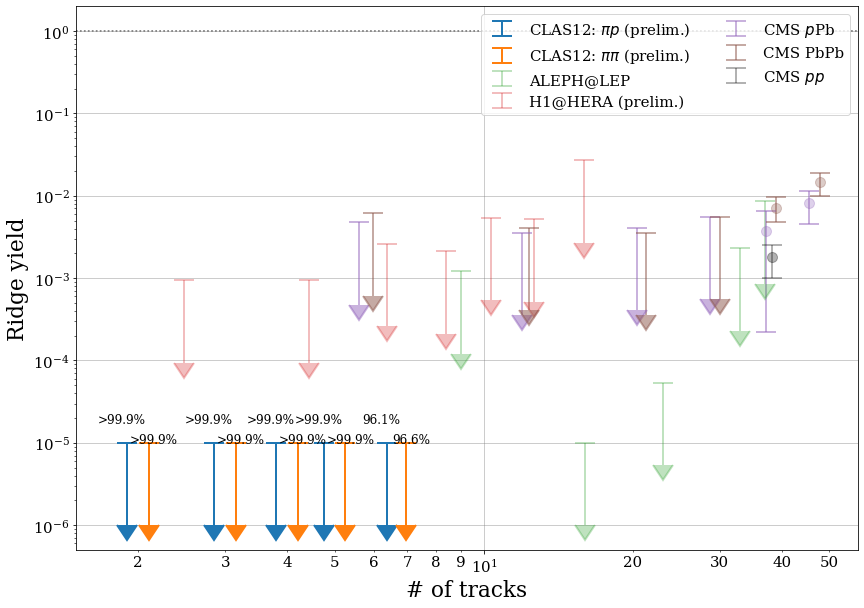

In [80]:
# money plot!!!!
handles = []
from matplotlib.ticker import FormatStrFormatter
fig,ax = plt.subplots(1,1, figsize=(14,10))  
ax.set_xlabel("# of tracks")
plt.grid(color='0.5',alpha=0.5)
plt.gca().set_ylabel("Ridge yield")
plt.axhline(1,linestyle=':',color='0.5',alpha=0.7)

#ALEPH
x = [9, 16, 23, 33, 37]
y = [1.21e-3, 1e-5, 5.38e-5, 2.31e-3,8.58e-3]
handles.append(plt.errorbar(x,y,pd.Series(y)*.9,label='ALEPH@LEP',linestyle='',alpha=0.3,
             fillstyle='none', color='tab:green',uplims=True,capsize=10,elinewidth=2,markeredgewidth=2))
ax.set_xscale('log')
ax.set_yscale('log')

#HERA
x = 2.471264367816093,4.42528735632184,6.379310344827587,8.390804597701148,\
        10.344827586206897,12.643678160919539,15.919540229885055
y = 0.0009411764705882342, 0.0009411764705882342, 0.0025882352941176467, 0.0021176470588235297,\
        0.005411764705882355, 0.0051764705882352935, 0.026823529411764707
handles.append(plt.errorbar(x,y,pd.Series(y)*.9,label='H1@HERA (prelim.)',linestyle='',alpha=0.3,
             fillstyle='none', color='tab:red',uplims=True,capsize=10,elinewidth=2,markeredgewidth=2))

#CMS pPb
x = pd.Series([5.596330,11.926606,20.366972,28.715596,37.155963,45.504587])
y = pd.Series([0.001767,0.001134,0.001134,0.002133,0.003739,0.008104])
yup = pd.Series([0.004765, 0.003543, 0.004058, 0.005551, 0.006590, 0.011549])
ylo = pd.Series([0,0,0,0,0.000220,0.004598])


handles.append(plt.errorbar(x,y*(ylo !=0)+yup*(ylo==0),[(y-ylo)*(ylo !=0)+(yup*.9)*(ylo == 0),yup-y],
             label='CMS $p$Pb',linestyle='',alpha=0.5,fillstyle='none', color='tab:purple',
             uplims=(ylo==0),capsize=10,elinewidth=2,markeredgewidth=2))
plt.plot(x,y*(ylo>1e-5), linestyle='',marker='o',fillstyle='full',color='tab:purple',alpha=0.3,markersize=10)




#CMS PbPb
x = pd.Series([5.688073,11.743119,20.275229,28.623853,37.155963,45.504587,])
y = pd.Series([0.003007,0.000921,0.000621, 0.002457, 0.007074, 0.014799])
yup = pd.Series([0.006108, 0.004079, 0.003522, 0.005549, 0.009731, 0.018969])
ylo = pd.Series([0,0,0,0,0.004791,0.010026])

#shift for visual clarity
x = np.multiply(x,1.05)
#plt.errorbar(np.multiply(x,1.05),y,[np.subtract(y,ylo),np.subtract(yup,y)],label='CMS Pb Pb',linestyle='-',alpha=0.5,fillstyle='none', color='tab:brown')
handles.append(plt.errorbar(x,y*(ylo !=0)+yup*(ylo==0),[(y-ylo)*(ylo !=0)+(yup*.9)*(ylo == 0),yup-y],
             label='CMS PbPb',linestyle='',alpha=0.5,fillstyle='none', color='tab:brown',
             uplims=(ylo==0),capsize=10,elinewidth=2,markeredgewidth=2))
plt.plot(x,y*(ylo>1e-5), linestyle='',marker='o',fillstyle='full',color='tab:brown',alpha=0.3,markersize=10)


#38.348624, 0.001785
#38.348624, 0.002543
#38.348624, 0.001012
handles.append(plt.errorbar([38.348624],[0.001785], [[0.001785-0.001012],[0.002543-0.001785]],label='CMS $pp$',linestyle='',alpha=0.3,fillstyle='full', color='black',
             capsize=10,elinewidth=2,markeredgewidth=2))
plt.plot([38.348624],[0.001785],linestyle='',alpha=0.3,fillstyle='full', color='black',marker='o',markersize=10)


plt.tick_params(axis='x', which='minor')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(loc='upper right',ncol=2)
plt.gca().set_xlim(1.5,57)
plt.savefig("../images/moneyplot_noCLAS12.pdf",bbox_inches='tight')

partitions = [1.5,2.5, 3.5, 4.5, 5.5, 10.5]
handles.append(exclusion_plot(pi_p_mXcut,pi_p_mXcut_mixed, "nhtracks",partitions=partitions,offset=-0.05,label='CLAS12: $\pi p$ (prelim.)',color='tab:blue',thresh=1e-5))
 

handles.append(exclusion_plot(pi_pi,pi_pi_mixed, "nhtracks",partitions=partitions,offset=0.05, label='CLAS12: $\pi\pi$ (prelim.)',color='tab:orange',thresh=1e-5))


plt.legend(loc='upper right', handles = [handles[i] for i in [5,6,0,1,2,3,4]], ncol=2)
plt.savefig(image_dir+"/moneyplot.pdf",bbox_inches='tight')



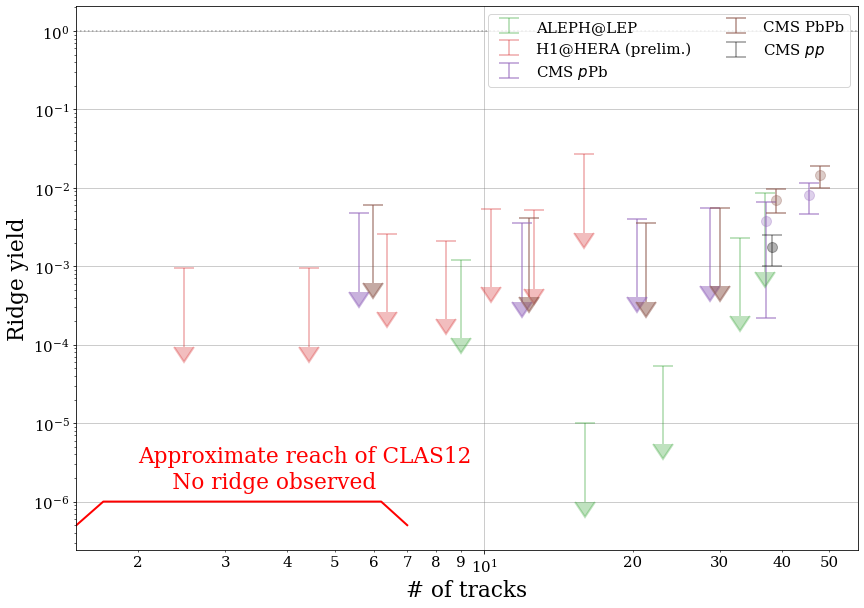

In [45]:
# money plot (null result)!!!!
handles = []
from matplotlib.ticker import FormatStrFormatter
fig,ax = plt.subplots(1,1, figsize=(14,10))  
ax.set_xlabel("# of tracks")
plt.grid(color='0.5',alpha=0.5)
plt.gca().set_ylabel("Ridge yield")
plt.axhline(1,linestyle=':',color='0.5',alpha=0.7)

#ALEPH
x = [9, 16, 23, 33, 37]
y = [1.21e-3, 1e-5, 5.38e-5, 2.31e-3,8.58e-3]
handles.append(plt.errorbar(x,y,pd.Series(y)*.9,label='ALEPH@LEP',linestyle='',alpha=0.3,
             fillstyle='none', color='tab:green',uplims=True,capsize=10,elinewidth=2,markeredgewidth=2))
ax.set_xscale('log')
ax.set_yscale('log')

#HERA
x = 2.471264367816093,4.42528735632184,6.379310344827587,8.390804597701148,\
        10.344827586206897,12.643678160919539,15.919540229885055
y = 0.0009411764705882342, 0.0009411764705882342, 0.0025882352941176467, 0.0021176470588235297,\
        0.005411764705882355, 0.0051764705882352935, 0.026823529411764707
handles.append(plt.errorbar(x,y,pd.Series(y)*.9,label='H1@HERA (prelim.)',linestyle='',alpha=0.3,
             fillstyle='none', color='tab:red',uplims=True,capsize=10,elinewidth=2,markeredgewidth=2))

#CMS pPb
x = pd.Series([5.596330,11.926606,20.366972,28.715596,37.155963,45.504587])
y = pd.Series([0.001767,0.001134,0.001134,0.002133,0.003739,0.008104])
yup = pd.Series([0.004765, 0.003543, 0.004058, 0.005551, 0.006590, 0.011549])
ylo = pd.Series([0,0,0,0,0.000220,0.004598])


handles.append(plt.errorbar(x,y*(ylo !=0)+yup*(ylo==0),[(y-ylo)*(ylo !=0)+(yup*.9)*(ylo == 0),yup-y],
             label='CMS $p$Pb',linestyle='',alpha=0.5,fillstyle='none', color='tab:purple',
             uplims=(ylo==0),capsize=10,elinewidth=2,markeredgewidth=2))
plt.plot(x,y*(ylo>1e-5), linestyle='',marker='o',fillstyle='full',color='tab:purple',alpha=0.3,markersize=10)




#CMS PbPb
x = pd.Series([5.688073,11.743119,20.275229,28.623853,37.155963,45.504587,])
y = pd.Series([0.003007,0.000921,0.000621, 0.002457, 0.007074, 0.014799])
yup = pd.Series([0.006108, 0.004079, 0.003522, 0.005549, 0.009731, 0.018969])
ylo = pd.Series([0,0,0,0,0.004791,0.010026])

#shift for visual clarity
x = np.multiply(x,1.05)
#plt.errorbar(np.multiply(x,1.05),y,[np.subtract(y,ylo),np.subtract(yup,y)],label='CMS Pb Pb',linestyle='-',alpha=0.5,fillstyle='none', color='tab:brown')
handles.append(plt.errorbar(x,y*(ylo !=0)+yup*(ylo==0),[(y-ylo)*(ylo !=0)+(yup*.9)*(ylo == 0),yup-y],
             label='CMS PbPb',linestyle='',alpha=0.5,fillstyle='none', color='tab:brown',
             uplims=(ylo==0),capsize=10,elinewidth=2,markeredgewidth=2))
plt.plot(x,y*(ylo>1e-5), linestyle='',marker='o',fillstyle='full',color='tab:brown',alpha=0.3,markersize=10)


#38.348624, 0.001785
#38.348624, 0.002543
#38.348624, 0.001012
handles.append(plt.errorbar([38.348624],[0.001785], [[0.001785-0.001012],[0.002543-0.001785]],label='CMS $pp$',linestyle='',alpha=0.3,fillstyle='full', color='black',
             capsize=10,elinewidth=2,markeredgewidth=2))
plt.plot([38.348624],[0.001785],linestyle='',alpha=0.3,fillstyle='full', color='black',marker='o',markersize=10)


plt.tick_params(axis='x', which='minor')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(loc='upper right',ncol=2)
plt.gca().set_xlim(1.5,57)
plt.savefig("../images/moneyplot_noCLAS12.pdf",bbox_inches='tight')

#partitions = [1.5,2.5, 3.5, 4.5, 5.5, 10.5]
#handles.append(exclusion_plot(pi_p_mXcut,pi_p_mXcut_mixed, "nhtracks",partitions=partitions,offset=-0.05,label='CLAS12: $\pi p$ (prelim.)',color='tab:blue',thresh=1e-5))
 

#handles.append(exclusion_plot(pi_pi,pi_pi_mixed, "nhtracks",partitions=partitions,offset=0.05, label='CLAS12: $\pi\pi$ (prelim.)',color='tab:orange',thresh=1e-5))

plt.plot([1.5,1.7,6.2,7],[0.5e-6,1e-6,1e-6,0.5e-6],linestyle='-',color='r',linewidth=2)
plt.text( 2, 1.5e-6,"Approximate reach of CLAS12\n     No ridge observed",color='r',fontsize='x-large')

plt.legend(loc='upper right', handles = handles, ncol=2)
plt.savefig(image_dir+"/moneyplot_null.pdf",bbox_inches='tight')

In [66]:
#crap from another notebook.  
ymc,xmc = [],[]
ymc.append( [0.09207500007593435, 0.07232188587279273, 0.05368386682628006, 0.04460380626515851, 0.042532915259990436, 0.0385902573847666, 0.03675831534173331, 0.040780622871002065, 0.04555960211369762, 0.05925934260942488, 0.07017134521357973, 0.0893270870113844, 0.12875366576362274, 0.1738353699530508, 0.22775818574146564, 0.2980888302631352, 0.3527284929379544, 0.3825971132048016, 0.3844290552478349, 0.3571490487374478, 0.2971330344145961, 0.23448858150826188, 0.16929533967249003, 0.12779786991508363] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.11475938069331935, 0.08391083357733606, 0.0725602394917711, 0.060513289940834054, 0.05348009974057601, 0.04749144273837609, 0.04623800290070634, 0.04937160249488072, 0.06114000985966893, 0.07047117309565484, 0.08460718904270814, 0.10368732879390323, 0.1417779727497562, 0.18202731864826263, 0.2260369840597783, 0.28515756306986817, 0.3239445624910932, 0.34260688896306507, 0.3353647921231954, 0.32171622500190256, 0.26816648971478935, 0.22471390867557134, 0.17993825225214638, 0.14003708408632598] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.10524991768364843, 0.0847688526208844, 0.06802131504352008, 0.060696489691212115, 0.05482951792844117, 0.05194936815398998, 0.04956702204425875, 0.05347833655277271, 0.06094539152357209, 0.07587950146517085, 0.0851599840717358, 0.10599662318072836, 0.1439363739133138, 0.17970712296390512, 0.2308031134069466, 0.27560544323174285, 0.31269181625337983, 0.33694196620616634, 0.34014213262222326, 0.3157853104555681, 0.2737209007867316, 0.22994973569599808, 0.18347620785392765, 0.1404161908556512] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.11640755914458244, 0.08386407749881562, 0.06946477362637747, 0.060234450631224803, 0.05290293693793212, 0.049316297145529944, 0.05042393590494826, 0.05374685218320322, 0.06039268473971313, 0.07115260411691966, 0.08354760928183896, 0.10960349247958419, 0.14351833639891654, 0.18065060719084497, 0.22991415963354547, 0.275854795797991, 0.320424069688871, 0.3336629900990614, 0.3147276417832911, 0.3172066428162749, 0.2770151792602388, 0.23619077927024928, 0.18233843768138716, 0.14715772089414816] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.11602662517970312, 0.09179080051223223, 0.07423414012319822, 0.07003580829103791, 0.0658374764588776, 0.05572331340867321, 0.049234982395334546, 0.06202081115691367, 0.06717330931456496, 0.07003580829103791, 0.08453913643850079, 0.11373662599852477, 0.15762827697110984, 0.19121493162839232, 0.2248015862856748, 0.2772807341876787, 0.2891123966237668, 0.31411155435163046, 0.3295690488245844, 0.3003715592645604, 0.26373157236570677, 0.21754992221194336, 0.1915965981585887, 0.14236161576325415] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.12357230696928452, 0.09804563322915062, 0.08663598360287866, 0.07097188835325105, 0.06342991656639331, 0.06536375548610042, 0.05956223872697908, 0.07155204002916318, 0.07948077959996235, 0.08818305473864435, 0.09398457149776569, 0.12550614588899164, 0.14793867735759414, 0.17675287726123012, 0.22490546636193723, 0.24405047166703767, 0.28968907017212553, 0.3053531654217531, 0.2912361413078912, 0.2817603306013264, 0.2720911360027908, 0.2245186985779958, 0.1800404034247322, 0.15509388136051047] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.11637135623923535, 0.11226413190137997, 0.08351356153639243, 0.049286692054264385, 0.053393916392119746, 0.057501140729975114, 0.061608365067830476, 0.06845373896425609, 0.07666818763996681, 0.06845373896425609, 0.08898986065353291, 0.08898986065353291, 0.15607452483850387, 0.1957776934377724, 0.22863548814061532, 0.22863548814061532, 0.34911406871770606, 0.2943510775463012, 0.28339847931202017, 0.3176253487941482, 0.28066032975344996, 0.24780253505060704, 0.1697652726313551, 0.14238377704565267] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.1154703599960461, 0.10525174406719245, 0.08890195858102663, 0.07255217309486083, 0.08788009698814128, 0.06642100353754864, 0.07766148105928763, 0.08481451220948519, 0.0705084499090901, 0.07970520424505836, 0.08890195858102663, 0.1379513150395241, 0.1634978548616582, 0.17371647079051183, 0.20641604176284345, 0.23502816636363363, 0.3004273083082969, 0.30451475467983835, 0.24933422866402874, 0.2902086923794433, 0.24013747432806046, 0.22889699680632147, 0.19313184105533374, 0.15838854689723136] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.011610087034059236, 0.06966052220435542, 0.023220174068118472, 0.06966052220435542, 0.046440348136236945, 0.023220174068118472, 0.046440348136236945, 0.046440348136236945, 0.09288069627247389, 0.058050435170296184, 0.09288069627247389, 0.11610087034059237, 0.18576139254494778, 0.2205916536471255, 0.2205916536471255, 0.3134723499195994, 0.29025217585148094, 0.3250824369536586, 0.3483026110217771, 0.3483026110217771, 0.24381182771524398, 0.20898156661306627, 0.2205916536471255, 0.19737147957900703] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.14218918773692177, 0.07755773876559369, 0.11633660814839053, 0.06463144897132808, 0.07109459386846088, 0.06463144897132808, 0.09694717345699211, 0.12926289794265616, 0.07109459386846088, 0.11633660814839053, 0.09694717345699211, 0.1615786224283202, 0.1615786224283202, 0.15511547753118737, 0.20682063670824985, 0.20035749181111703, 0.1809680571197186, 0.2455995060910467, 0.3490098244451716, 0.336083534650906, 0.2520626509881795, 0.19389434691398422, 0.1745049122225858, 0.15511547753118737] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )

In [25]:
ymc,xmc = [],[]
ymc.append( [0.0958431234041084, 0.06637986678353437, 0.05257365485267115, 0.043919761142383704, 0.04076834320164319, 0.03641638509300152, 0.03681656514896857, 0.04066829818765142, 0.04457005373333016, 0.05757590555225927, 0.07308288272098244, 0.09164123281645438, 0.12695712275554652, 0.168025600999165, 0.22800258688722655, 0.3018858297201431, 0.3590115327094394, 0.3881246317810423, 0.3964283679423586, 0.36216295065017995, 0.2935820935588268, 0.22485116894648605, 0.16457404801644918, 0.12585662760163713] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.11518202957043917, 0.08829176553947059, 0.07416508305315529, 0.062330888514180637, 0.05681652561382072, 0.047398737289610526, 0.048885756498696344, 0.048947715632408254, 0.05780787175321127, 0.07397920565201957, 0.08717650113265622, 0.11245582768711516, 0.14603767815896995, 0.17850426422401036, 0.22565516497877325, 0.2752224719483006, 0.3136371348496843, 0.33693376912536216, 0.33507499511400485, 0.3116544425709032, 0.2711951282570265, 0.22348659529885642, 0.1836468723220988, 0.14523220942071513] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.10170915008311524, 0.08342625529494463, 0.06390574916726709, 0.05709888679997896, 0.0506295547980109, 0.047873056814563636, 0.04781680175367696, 0.05214844144195123, 0.057267651982638994, 0.07065635647366854, 0.08235740913809773, 0.10632206507582288, 0.1352371663715758, 0.17320933247008397, 0.22558279415558188, 0.2780125109019665, 0.3307797580136712, 0.3555319848038099, 0.34366216695672064, 0.3311172883789913, 0.2807127538245271, 0.23053323951360963, 0.18221014221195256, 0.13191811777926174] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.11716646990089472, 0.09475351014979401, 0.0741748591251261, 0.06345561750503446, 0.05634767119010739, 0.05399746313436537, 0.0529083423280459, 0.060589510119983224, 0.06351293965273548, 0.07520665778374455, 0.08701502021015566, 0.11074638935837992, 0.1423308927416446, 0.18497857063120707, 0.22447353039721316, 0.2652295774126418, 0.3047245371786479, 0.31739273182057437, 0.3184818526268938, 0.3091956646993278, 0.2757195304419293, 0.23226934248455253, 0.18801664445936137, 0.14703130885312862] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.11080994963389677, 0.08354718424777931, 0.06449256327898753, 0.05892275099580225, 0.05980219504051572, 0.04807627444433616, 0.04250646216115088, 0.05980219504051572, 0.06478571129389203, 0.0759253358602626, 0.08589236836701522, 0.11462087382765512, 0.14276308325848605, 0.18673528549415935, 0.24214026031110775, 0.2779043181294554, 0.30780541564971325, 0.3409311413339205, 0.3459146575872968, 0.3007698632920055, 0.2638332134140399, 0.23070748772983268, 0.17618195695759778, 0.13484808685606484] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.12028368177774773, 0.10071089332278878, 0.08736581028531677, 0.07935876046283356, 0.06690334962785968, 0.06690334962785968, 0.05604934875738245, 0.07063997287835184, 0.06975030067585372, 0.08416299035632349, 0.09768600783429512, 0.12028368177774773, 0.14430483124519736, 0.18629735920310928, 0.22046077177903764, 0.24038942911499583, 0.2859406458829003, 0.3056913687783589, 0.31102940199334767, 0.28131435042991, 0.25836080760545815, 0.2220621817435343, 0.19341473682309435, 0.15035460222218466] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.10629175595480046, 0.07236885511816202, 0.07915343528548971, 0.05879969478350664, 0.05879969478350664, 0.05653816806106408, 0.05427664133862151, 0.05879969478350664, 0.05879969478350664, 0.0859380154528174, 0.061061221505949205, 0.09950717578747278, 0.16735297746074967, 0.1537838171260943, 0.2148450386320435, 0.26686015324822243, 0.3256598480317291, 0.3550596954234824, 0.3618442755908101, 0.3075676342521886, 0.26459862652577987, 0.23067572568914144, 0.1650914507383071, 0.15604534384853685] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.11676811672186015, 0.10929495725166109, 0.09808521804636251, 0.0840730440397393, 0.08594133390728906, 0.07099501496689097, 0.05698284096026775, 0.07753402950331513, 0.09154620350993835, 0.09621692817881275, 0.11116324711921086, 0.11583397178808526, 0.15226562420530562, 0.18682898675497622, 0.21111675503312313, 0.251284987185443, 0.2811776250662392, 0.29799223387418705, 0.30079466867551174, 0.2559557118543174, 0.22045820437087194, 0.20644603036424872, 0.18869727662252597, 0.15226562420530562] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.036205863831331654, 0.09051465957832913, 0.07241172766266331, 0.036205863831331654, 0.05430879574699748, 0.018102931915665827, 0.05430879574699748, 0.036205863831331654, 0.0, 0.05430879574699748, 0.10861759149399496, 0.09051465957832913, 0.23533811490365572, 0.27154397873498737, 0.12672052340966078, 0.23533811490365572, 0.30774984256631904, 0.30774984256631904, 0.28964691065065323, 0.45257329789164563, 0.3620586383133165, 0.27154397873498737, 0.14482345532532662, 0.16292638724099243] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )
ymc.append( [0.10261930659059523, 0.11402145176732803, 0.10832037917896163, 0.03990750811856481, 0.07411394364876323, 0.10261930659059523, 0.07411394364876323, 0.08551608882549602, 0.057010725883664015, 0.14252681470916004, 0.14252681470916004, 0.17103217765099205, 0.13682574212079365, 0.14252681470916004, 0.22804290353465606, 0.18243432282772487, 0.19953754059282405, 0.30785791977178567, 0.2907547020066865, 0.3135589923601521, 0.21093968576955688, 0.3021568471834193, 0.12542359694406083, 0.16533110506262566] )
xmc.append( [-1.439896632895322, -1.1780972450961724, -0.9162978572970231, -0.6544984694978736, -0.39269908169872425, -0.1308996938995748, 0.13089969389957468, 0.39269908169872403, 0.6544984694978735, 0.9162978572970228, 1.1780972450961722, 1.4398966328953218, 1.7016960206944711, 1.9634954084936205, 2.22529479629277, 2.4870941840919194, 2.7488935718910685, 3.010692959690218, 3.2724923474893677, 3.534291735288517, 3.7960911230876664, 4.057890510886816, 4.319689898685965, 4.581489286485114] )

[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5  1.7  1.9  2.1  2.3  2.5]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5  1.7  1.9  2.1  2.3  2.5]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5  1.7  1.9  2.1  2.3  2.5]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5  1.7  1.9  2.1  2.3  2.5]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5  1.7  1.9  2.1  2.3  2.5]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5  1.7  1.9  2.1  2.3  2.5]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5  1.7  1.9  2.1  2.3  2.5]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5  1.7  1.9  2.1  2.3  2.5]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9  1.1
  1.3  1.5  1.7  1.9  2.1  2.3  2.5]
[-1.5 -1.3 -1.1 -0.9 -0.7 -0

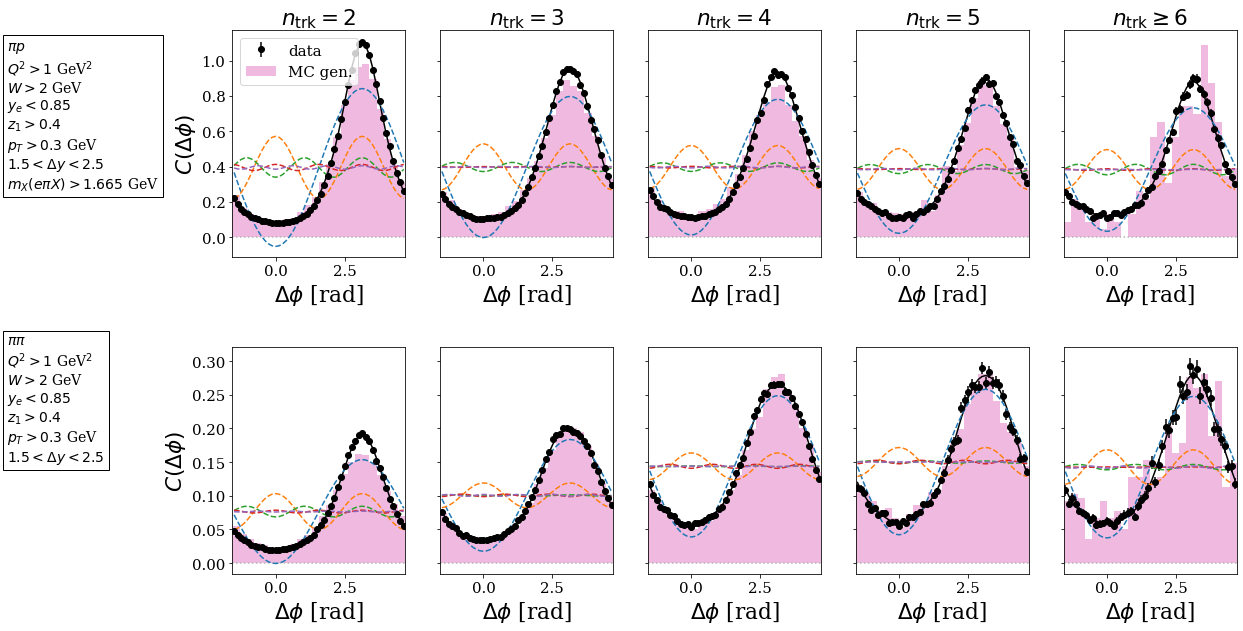

In [26]:
gc.collect()
fig,axs = plt.subplots(2,5, figsize=(18,10),sharey='row')
fig.subplots_adjust(hspace=0.4)

axs[0][0].text(-1.3,0.3,"$\pi p$\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$y_e<0.85$\n$z_{1}>0.4$\n$p_T>0.3$ GeV\n$1.5<\Delta y<2.5$\n$m_X(e\pi X)>1.665$ GeV",
               bbox=dict(facecolor='white', alpha=1),transform=axs[0][0].transAxes,fontsize=14)
#axs[1][0].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.5$\n$1.5<\Delta y<2.5$",loc='upper left'))
axs[1][0].text(-1.3,0.5,"$\pi\pi$\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$y_e<0.85$\n$z_{1}>0.4$\n$p_T>0.3$ GeV\n$1.5<\Delta y<2.5$",
               bbox=dict(facecolor='white', alpha=1),transform=axs[1][0].transAxes,fontsize=14)
for ax in axs[0][0],axs[1][0]:
    ax.set_ylabel("$C(\\Delta\\phi)$")

ii = 0
for q,label,ax1,ax2 in zip(["nhtracks == 2","nhtracks == 3","nhtracks == 4","nhtracks == 5","nhtracks>=6"],
                   ['$n_{\\mathrm{trk}}' + k +"$" for k in '=2;=3;=4;=5;\\geq 6'.split(';')],
                   axs[0],axs[1]):
    ax1.set_title(label)
    plt.sca(ax1)
    x,y,dy = corr1d(pi_p_mXcut.query(q),pi_p_mXcut_mixed,deta_range=(-1.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False,label ='data')
    area = sum(y)*(x[1]-x[0])
    
    #now add MC
    plt.bar(xmc[ii], np.multiply(ymc[ii],area), width=xmc[ii][1]-xmc[ii][0], alpha=0.5,color='tab:pink',label='MC gen.')
    ii+=1
    plt.sca(ax2)
    x,y,dy = corr1d(pi_pi.query(q),pi_pi_mixed,deta_range=(-1.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False,label ='data')
    area = sum(y)*(x[1]-x[0])
    
    #now add MC
    plt.bar(xmc[ii], np.multiply(ymc[ii],area), width=xmc[ii][1]-xmc[ii][0], alpha=0.5,color='tab:pink',label='MC gen.')
    ii+=1
axs[0][0].legend()
plt.savefig(image_dir+"/corrs_vs_ntracks_with_mc.pdf",bbox_inches='tight')

In [ ]:
fig,axs = plt.subplots(2,5, figsize=(18,10))
fig.subplots_adjust(hspace=0.4)

axs[0][0].text(0,0.5,"$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.4$\n$1.5<\Delta y<2.5$\n$m_X(e\pi X)>1.665$ GeV",
               bbox=dict(facecolor='white', alpha=0.5),transform=axs[0][0].transAxes,fontsize=12)
#axs[1][0].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.5$\n$1.5<\Delta y<2.5$",loc='upper left'))
axs[1][0].text(0,0.5,"$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.4$\n$1.5<\Delta y<2.5$",
               bbox=dict(facecolor='white', alpha=0.5),transform=axs[1][0].transAxes,fontsize=12)

for q,label,ax1,ax2 in zip(["nhtracks == 2","nhtracks == 3","nhtracks == 4","nhtracks == 5", "nhtracks >=6"],
                   ['$n_{\\mathrm{trk}}' + k +"$" for k in '=2 =3 =4 =5 >=6'.split()],
                   axs[0],axs[1]):
    ax1.set_title(label)
    plt.sca(ax1)
    x,y,dy = corr1d(pi_p_mXcut.query(q),pi_p_mXcut_mixed.query(q),deta_range=(-1.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False)
    area = sum(y)*(x[1]-x[0])
    corr1d(pi_p_mXcut_mc.query(q),pi_p_mXcut_mixed_mc.query(q),deta_range=(-1.5,2.5),bins=20,area=area,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False,style='fill')
    ax2.set_title(label + ",   $\pi\pi$")
    plt.sca(ax2)
    x,y,dy = corr1d(pi_pi.query(q),pi_pi_mixed.query(q),deta_range=(-1.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False)
    area = sum(y)*(x[1]-x[0])
    x,y,dy = corr1d(pi_pi_mc.query(q),pi_pi_mixed_mc.query(q),deta_range=(-1.5,2.5),bins=20,area=area,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False,style='fill')
    print("x,y,dy = ", x,y,dy)
plt.savefig("../images/corrs_vs_ntracks_with_mc.pdf",bbox_inches='tight')

In [ ]:
fig,axs = plt.subplots(2,4, figsize=(18,10))
fig.subplots_adjust(hspace=0.3)
axs[0][0].text(0,0.5,"$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.5$\n$1.5<\Delta y<2.5$\n$m_X(e\pi X)>1.665$ GeV",
               bbox=dict(facecolor='white', alpha=0.5),transform=axs[0][0].transAxes,fontsize=12)
#axs[1][0].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.5$\n$1.5<\Delta y<2.5$",loc='upper left'))
axs[1][0].text(0,0.5,"$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.5$\n$1.5<\Delta y<2.5$",
               bbox=dict(facecolor='white', alpha=0.5),transform=axs[1][0].transAxes,fontsize=12)

for q,label,ax1,ax2 in zip(["0<=h2_z and h2_z <.1","0.1<=h2_z and h2_z <0.2","0.2<=h2_z and h2_z <0.3","0.3<=h2_z and h2_z <0.5"],
                   "$0\leq{}z_2<0.1$ $0.1\leq{}z_2<0.2$ $0.2\leq{}z_2<0.3$ $0.3\leq{}z_2<0.5$".split(),
                   axs[0],axs[1]):
    ax1.set_title(label + ",   $\pi p$")
    plt.sca(ax1)
    corr1d(pi_p_mXcut.query(q),pi_p_mXcut_mixed.query(q),deta_range=(-1.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False)
    
    ax2.set_title(label + ",   $\pi\pi$")
    plt.sca(ax2)
    corr1d(pi_pi.query(q),pi_pi_mixed.query(q),deta_range=(-1.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False)
plt.savefig("../images/corrs_vs_z2.pdf",bbox_inches='tight')

In [ ]:
for i, (q,label) in enumerate(zip(["0<=h2_z and h2_z <.1","0.1<=h2_z and h2_z <0.2","0.2<=h2_z and h2_z <0.3","0.3<=h2_z and h2_z <0.5"],
                   "$0\leq{}z_2<0.1$ $0.1\leq{}z_2<0.2$ $0.2\leq{}z_2<0.3$ $0.3\leq{}z_2<0.5$".split(),
                   )):
    
    dphi_deta_plot_3_proj(pi_p_mXcut.query(q),pi_p_mXcut_mixed.query(q),
                          text="$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.5$\n$1.5<\Delta y<2.5$\n$m_X(e\pi X)>1.665$ GeV\n" + label)
    plt.savefig("../images/smc_vs_z2_pi_p_bin%s.pdf" %i,bbox_inches='tight')
    plt.show()
    dphi_deta_plot_3_proj(pi_pi.query(q),pi_pi_mixed.query(q),
                          text = "$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.5$\n$1.5<\Delta y<2.5$\n" + label)
    plt.savefig("../images/smc_vs_z2_pi_pi_bin%s.pdf" % i,bbox_inches='tight')
    plt.show()

In [ ]:
#check yields:

exclusion_plot(pi_p,pi_p_mixed, "nhtracks",partitions=[1.5,2.5, 3.5, 4.5, 10.5],
               label='CLAS12:  $\pi p$',color='tab:blue',plotYields=True)

exclusion_plot(pi_pi,pi_pi_mixed, "nhtracks",partitions=[1.5,2.5,3.5, 4.5, 10.5], 
               label='CLAS12:  $\pi\pi$',color='tab:orange',plotYields=True)



NameError: name 'exclusion_plot' is not defined

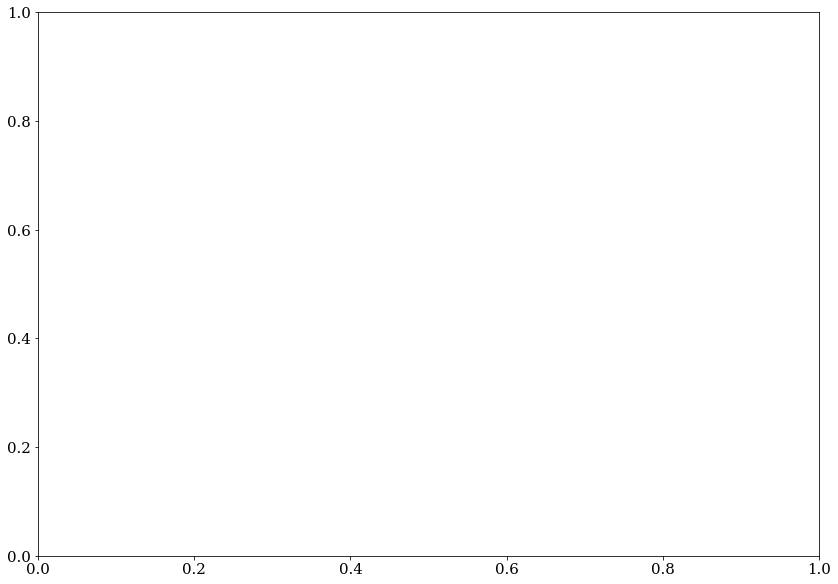

In [12]:
# money plot!!!! (old version)

from matplotlib.ticker import FormatStrFormatter
fig,ax = plt.subplots(1,1, figsize=(14,10))  
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212")
nbins = 7
exclusion_plot(df,df_mixed, "nhtracks",partitions=[1.5,2.5, 3.5, 4.5, 10.5],offset=-0.1,label='CLAS12:  $\pi p$',color='tab:blue')
 
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211")
nbins = 7
exclusion_plot(df,df_mixed, "nhtracks",partitions=[1.5,2.5,3.5, 4.5, 10.5],offset=0.1, label='CLAS12:  $\pi\pi$',color='tab:orange')
ax.set_xlabel("# of tracks")

x = [9, 16, 23, 33, 37]
y = [1.21e-3, 1e-5, 5.38e-5, 2.31e-3,8.58e-3]
plt.errorbar(x,[0]*len(y),[[0]*len(y),y],label='ALEPH@LEP',linestyle='-',alpha=0.5,fillstyle='none', color='tab:green')
ax.set_xscale('log')


x = 2.471264367816093,4.42528735632184,6.379310344827587,8.390804597701148,\
        10.344827586206897,12.643678160919539,15.919540229885055
y = 0.0009411764705882342, 0.0009411764705882342, 0.0025882352941176467, 0.0021176470588235297,\
        0.005411764705882355, 0.0051764705882352935, 0.026823529411764707
plt.errorbar(x,[0]*len(y),[[0]*len(y),y],label='H1@HERA (preliminary)',linestyle='-',alpha=0.5,fillstyle='none', color='tab:red')

#CMS pPb
x = 5.596330,11.926606,20.366972,28.715596,37.155963,45.504587
y = 0.001767,0.001134,0.001134,0.002133,0.003739,0.008104
yup = 0.004765, 0.003543, 0.004058, 0.005551, 0.006590, 0.011549
ylo = 0,0,0,0,0.000220,0.004598
plt.errorbar(x,y,[np.subtract(y,ylo),np.subtract(yup,y)],label='CMS pPb',linestyle='-',alpha=0.5,fillstyle='none', color='tab:purple')





#CMS PbPb
x = 5.688073,11.743119,20.275229,28.623853,37.155963,45.504587,
y = 0.003007,0.000921,0.000621, 0.002457, 0.007074, 0.014799
yup = 0.006108, 0.004079, 0.003522, 0.005549, 0.009731, 0.018969
ylo = 0,0,0,0,0.004791,0.010026

plt.errorbar(np.multiply(x,1.05),y,[np.subtract(y,ylo),np.subtract(yup,y)],label='CMS PbPb',linestyle='-',alpha=0.5,fillstyle='none', color='tab:brown')





plt.tick_params(axis='x', which='minor')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(loc='upper left')
plt.savefig("../images/moneyplot.pdf")


In [ ]:
# money plot 2!!!!

fig,ax = plt.subplots(1,1, figsize=(14,10))  
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and h1_pid==211")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and h1_pid==211")
nbins = 4
exclusion_plot(df,df_mixed, "nhtracks",1.5,1.5+nbins,nbins,offset=-0.2,label='CLAS12:  $\pi^+ p$')

df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and h1_pid==-211")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and h1_pid==-211")
nbins = 3
exclusion_plot(df,df_mixed, "nhtracks",1.5,1.5+nbins,nbins,offset=-0.1,label='CLAS12:  $\pi^- p$')
    
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 211 and h1_pid == 211")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 211 and h1_pid == 211")
nbins = 3
exclusion_plot(df,df_mixed, "nhtracks",1.5,1.5+nbins,nbins,offset=0.0, label='CLAS12:  $\pi^+\pi^+$')
ax.set_xlabel("# of tracks")

df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 211 and h1_pid == -211")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 211 and h1_pid == -211")
nbins = 3
exclusion_plot(df,df_mixed, "nhtracks",1.5,1.5+nbins,nbins,offset=0.1, label='CLAS12:  $\pi^-\pi^+$')
ax.set_xlabel("# of tracks")

df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == -211 and h1_pid == 211")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == -211 and h1_pid == 211")
nbins = 4
exclusion_plot(df,df_mixed, "nhtracks",1.5,1.5+nbins,nbins,offset=0.2, label='CLAS12:  $\pi^+\pi^-$')
ax.set_xlabel("# of tracks")


plt.legend()
plt.savefig("../images/moneyplot_2.pdf")

In [ ]:
#pi pi (either charge) 3 <=ntracks <=4
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211 and nhtracks >=3 and nhtracks<=4 and mx_eh1x >1.665")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211 and abs(h1_pid) == 211 and nhtracks >=3 and nhtracks<=4 and mx_eh1x >1.665")
#df_trig = data_triggers.query("h_cm_pt>0.3 and abs(h_pid) == 211")
fig,axs = dphi_deta_plot_3_proj(df,df_mixed,
              deta_range=(-0.5,2.5))
axs[0].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{\\pi1}>0.5$\nntracks=3 or 4",loc='upper left'))
plt.savefig("../images/smc_pi_pi_3to4.pdf",bbox_inches='tight')
plt.show()



#df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#                         + "and h2_pid == 2212")
#df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#                         + "and h2_pid == 211 and abs(h1_pid) == 211 and nhtracks >=3 and nhtracks<=4")
#df_trig = data_triggers.query("h_cm_pt>0.3 and abs(h_pid) == 211")
#fig,axs = dphi_deta_plot_3_proj(df,df_mixed,df_trig,
#              deta_range=(-0.5,2.5))
#axs[0].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{\\pi1}>0.5$\nntracks=3 or 4",loc='upper left'))
#plt.savefig("../images/smc_pi_pi_3to4.pdf",bbox_inches='tight')
#plt.show()


#a,b,c,d,y = upper_limit_yridge(df,df_mixed,n=3,bins = 100,miniterations=1000,maxiterations=1000,fitrange=(0,np.pi),
#                       progressPrintInterval=None, #print stats after every [...] iterations (don't print if 0)
#                       sayDone=False,projyrange=(1.5,2.5))
#plt.hist(y,bins=100)
#plt.show()

In [ ]:


#pi pi (either charge) nhtracks>=3
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and abs(h2_pid) == 2212 and h2_z<0.25")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and abs(h2_pid) == 2212 and h2_z <0.25")
df_trig = data_triggers.query("h_cm_pt>0.3 and abs(h_pid) == 211")
fig,axs = dphi_deta_plot_3_proj(df,df_mixed,df_trig,
              deta_range=(-0.5,2.5))
axs[0].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{\\pi1}>0.5$\n$0.0<z_2<0.25$",loc='upper left'))
plt.savefig("../images/smc_pi_p_low_z2.pdf",bbox_inches='tight')
plt.show()





df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and abs(h2_pid) == 2212 and h2_z>0.25 and h2_z<0.5")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + " and abs(h2_pid) == 2212 and h2_z >0.25 and h2_z<0.5")
df_trig = data_triggers.query("h_cm_pt>0.3 and abs(h_pid) == 211")
fig,axs = dphi_deta_plot_3_proj(df,df_mixed,df_trig,
              deta_range=(-0.5,2.5))
axs[0].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{\\pi1}>0.5$\n$0.25<z_2<0.5$",loc='upper left'))
plt.savefig("../images/smc_pi_p_high_z2.pdf",bbox_inches='tight')
plt.show()

In [ ]:
for addQuery, tag, label in [("h2_pid != 0", "_all","$\pi h$"),
                        ("h2_pid == 2212", "_pi_p","$\pi p$"),
                        ("abs(h2_pid) == 211","_pi_pi","$\pi\pi$"),
                        ("h2_pid > 0 and h1_pid > 0", "_++", "$\pi^+h^+$"),
                        ("h2_pid > 0 and h1_pid < 0", "_+-", "$\pi^+h^-$"),
                        ("h2_pid < 0 and h1_pid > 0", "_-+", "$\pi^-h^+$"),
                        ("h2_pid < 0 and h1_pid < 0", "_--", "$\pi^-h^-$")]:
    fig,axs = plt.subplots(5,2, figsize=(12,16))
    #df = data_dihadrons.query('h2_z>0.2 and h2_cm_pt>0.3 and h1_cm_pt>0.3 and diff_rap_cm > 1.5 and '+addQuery)
    #dfm = mixed.query('h2_z>0.2 and h2_cm_pt>0.3 and h1_cm_pt>0.3 and diff_rap_cm> 1.5 and '+addQuery)
    #axs[0][0].add_artist(AnchoredText(label + "\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_1>0.5$\n$\\Delta y>1.5$\n$z_2>0.2$",loc='upper left'))
    axs[0][0].add_artist(AnchoredText(label + "",loc='upper left'))
    for df, dfm in (data_dihadrons.query(addQuery), mixed.query(addQuery)),(mc_dihadrons.query(addQuery), mc_mixed.query(addQuery)):
        axs[0][0].hist(df.diff_phi_cm,bins=100,histtype='step',density='true')
        axs[0][0].set_xlabel("$\Delta\phi$ [rad]")


        axs[1][0].hist(dfm.diff_phi_cm,bins=100,histtype='step',density='true')
        axs[1][0].set_xlabel("$\Delta\phi$ mix [rad]")
        axs[2][0].hist(df.h1_cm_ph,bins=100,histtype='step',density='true')
        axs[2][0].set_xlabel("$\phi_1$  [rad]")
        axs[3][0].hist(df.h2_cm_ph,bins=100,histtype='step',density='true')
        axs[3][0].set_xlabel("$\phi_2$  [rad]")
        axs[4][0].hist(dfm.eval('h2_cm_ph'),bins=100,histtype='step',density='true')
        axs[4][0].set_xlabel("$\phi_2$ mix [rad]")


        axs[0][1].hist(df.h1_ph-df.h2_ph+2*np.pi*(df.h1_ph-df.h2_ph<-np.pi)-2*np.pi*(df.h1_ph-df.h2_ph>np.pi),bins=100,histtype='step',density='true')
        axs[0][1].set_xlabel("$\Delta\phi$ lab  [rad]")
        axs[1][1].hist(dfm.h1_ph-dfm.h2_ph+2*np.pi*(dfm.h1_ph-dfm.h2_ph<-np.pi)-2*np.pi*(dfm.h1_ph-dfm.h2_ph>np.pi),bins=100,histtype='step',density='true')
        axs[1][1].set_xlabel("$\Delta\phi$ mix lab  [rad]")

        axs[2][1].hist(df.h1_ph,bins=100,histtype='step',density='true')
        axs[2][1].set_xlabel("$\phi_1$ lab  [rad]")
        axs[3][1].hist(df.h2_ph,bins=100,histtype='step',density='true')
        axs[3][1].set_xlabel("$\phi_2$ lab  [rad]")
        axs[4][1].hist(dfm.eval('h2_ph'),bins=100,histtype='step',density='true')
        axs[4][1].set_xlabel("$\phi_2$ mix lab [rad]")
    axs[0][0].legend(labels='data mc'.split())
    fig.subplots_adjust(hspace=0.4)
    plt.savefig("../images/mixing_phi"+tag+".pdf")

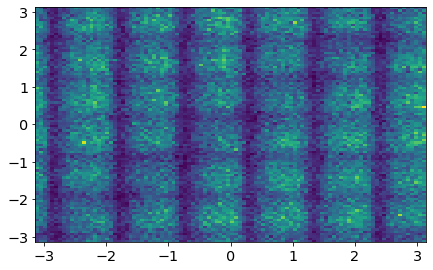

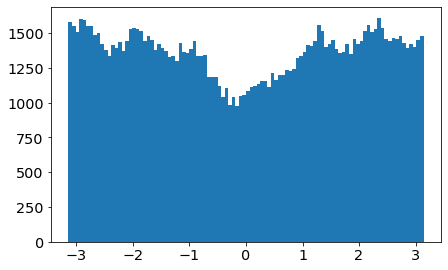

In [107]:
df = mixed.query('h2_z>0.2 and h2_cm_pt>0.3 and h1_cm_pt>0.3 and diff_rap_cm > 1.5')
df = mixed.query('h2_cm_pt>0.2')
plt.hist2d(df.h1_ph,df.h2_ph,bins=100)
plt.show()

def angle(a):
    return a+2*np.pi*(a<-np.pi)-2*np.pi*(a>np.pi)
plt.hist(angle(df.h1_ph-df.h2_ph),bins=100)
plt.show()

In [ ]:
for df0 in data_dihadrons, mc_dihadrons:
    df.histogram

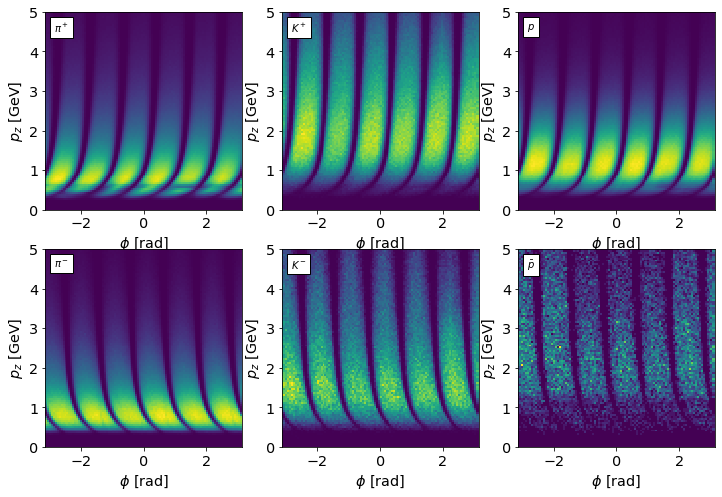

In [65]:
fig,axs = plt.subplots(2,3, figsize=(12, 8))
for j,(pid,name) in enumerate(((211,"$\\pi^+$"), (-211,"$\\pi^-$"), (321,"$K^+$"),
                                (-321,"$K^-$"),(2212,"$p$"),(-2212,"$\\bar p$"))):
    df = data_hadrons.query("h_pid == " + str(pid))
    plt.sca(axs[j%2][j//2])
    plt.hist2d(df.h_ph, df.h_pz, bins=100, range=((-np.pi, np.pi),(0,5)))
    plt.gca().add_artist(AnchoredText(name,loc='upper left'))
    plt.gca().set_xlabel("$\phi$ [rad]")
    plt.gca().set_ylabel("$p_z$ [GeV]")
plt.savefig("../images/phi_vs_pz.pdf")

In [ ]:
#use pseudorapidity since rapidity isn't in the mc tuples yet
#mc_dihadrons['h1_cm_rap']= mc_dihadrons['h1_cm_eta']
#mc_dihadrons['h2_cm_rap']= mc_dihadrons['h2_cm_eta']
#mix(mc_dihadrons)

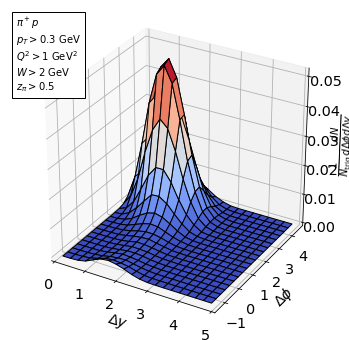

In [79]:

def offset(a):
    return a+2*np.pi*(a<-np.pi/2)-2*np.pi*(a>3*np.pi/2)

def dphi_deta_plot(df,df_mixed,df_trig,deta_range=(-2,6),bins=20,fig=None):
    dphi_range = (-np.pi/2,3*np.pi/2)
    x = df.diff_rap_cm
    y = offset(df.diff_phi_cm)
    if fig == None:
        fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[deta_range, dphi_range])
    
    denom = len(df_trig)*2*np.pi/bins*(deta_range[1]-deta_range[0])/bins
    hist = np.divide(hist, denom)
    xpos, ypos = np.meshgrid(np.add(xedges[:-1],xedges[1:])/2, np.add(yedges[:-1],yedges[1:])/2)
    zpos = 0

    surf = ax.plot_surface(xpos, ypos, hist.transpose(), cmap=cm.coolwarm,edgecolor='k')
    ax.set_xlabel("$\\Delta y$")
    ax.set_ylabel("$\\Delta\\phi$")
    ax.set_zlabel("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN}{d\\Delta\\phi d\\Delta y}$",rotation=-90)
    ax.set_xlim(*deta_range)
    ax.set_ylim(*dphi_range)
    return fig,ax
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
df_trig = data_triggers.query("h_cm_pt>0.3")
fig,ax = dphi_deta_plot(df,df_trig,
              deta_range=(0,5))
plt.gca().add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.savefig("../images/dphi_vs_deta_pi_p.pdf",bbox_inches='tight')
plt.show()

In [282]:

def offset(a):
    return a+2*np.pi*(a<-np.pi/2)-2*np.pi*(a>3*np.pi/2)
def dphi_deta_plot_3(df,df_mixed,df_trig,deta_range=(-1.5,2.5),bins=20,fig=None):
    dphi_range = (-np.pi/2,3*np.pi/2)
    if fig == None:
        fig = plt.figure(figsize=(18,6))
    ax1 = fig.add_subplot(131, projection='3d')
    
    denom = len(df_trig)*2*np.pi/bins*(deta_range[1]-deta_range[0])/bins
    hist1, xedges, yedges = np.histogram2d(df.diff_rap_cm, offset(df.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
    hist1 = np.divide(hist1, denom)
    print(xedges)
    hist2, xedges, yedges = np.histogram2d(df_mixed.diff_rap_cm, offset(df_mixed.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
    
    for i in range(bins):
        if xedges[i+1]>0:
            break
    for j in range(bins):
        if yedges[j+1]>0:
            break;
    denom = hist2[i][j]
    
    hist2 = np.divide(hist2,denom)
    
    
    hist3 = np.divide(hist1,hist2)
    
    xpos, ypos = np.meshgrid(np.add(xedges[:-1],xedges[1:])/2, np.add(yedges[:-1],yedges[1:])/2)
    zpos = 0

    surf = ax1.plot_surface(xpos, ypos, hist1.transpose(), cmap=cm.coolwarm,edgecolor='k')
    ax1.set_xlabel("$\\Delta y$")
    ax1.set_ylabel("$\\Delta\\phi$")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_title("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN}{d\\Delta\\phi d\\Delta y}$",rotation=0)
    ax1.set_xlim(*deta_range)
    ax1.set_ylim(*dphi_range)
    
    
    ax2 = fig.add_subplot(132, projection='3d')
    surf = ax2.plot_surface(xpos, ypos, hist2.transpose(), cmap=cm.coolwarm,edgecolor='k')
    ax2.set_xlabel("$\\Delta y$")
    ax2.set_ylabel("$\\Delta\\phi$")
    ax2.zaxis.set_rotate_label(False)
    ax2.set_title("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN}{d\\Delta\\phi d\\Delta y}$ mix",rotation=0)
    ax2.set_xlim(*deta_range)
    ax2.set_ylim(*dphi_range)
    
    
    
    ax3 = fig.add_subplot(133, projection='3d')
    surf = ax3.plot_surface(xpos, ypos, hist3.transpose(), cmap=cm.coolwarm,edgecolor='k')
    ax3.set_xlabel("$\\Delta y$")
    ax3.set_ylabel("$\\Delta\\phi$")
    ax3.zaxis.set_rotate_label(False)
    ax3.set_title("$C(\\Delta\\phi,\\Delta y)$",rotation=0)
    ax3.set_xlim(*deta_range)
    ax3.set_ylim(*dphi_range)
    
    
    return fig,[ax1,ax2,ax3]

In [ ]:
def v2_plot(df, df_mixed, )

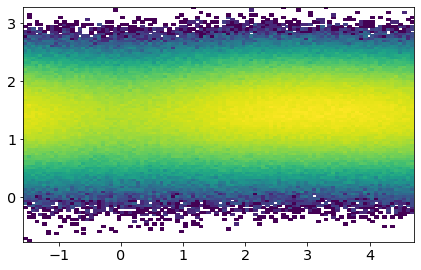

In [245]:
import matplotlib as mpl
df = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212 and abs(h1_pid) == 211")
plt.hist2d(offset(df.diff_phi_cm),df.diff_rap_cm,norm=mpl.colors.LogNorm(), bins=100)
plt.show()

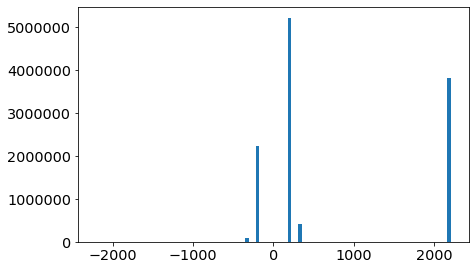

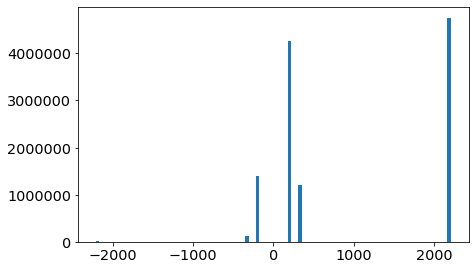

In [189]:
plt.hist(mixed.h2_pid, bins=100)
plt.show()
plt.hist(mixed.h1_pid, bins=100)
plt.show()

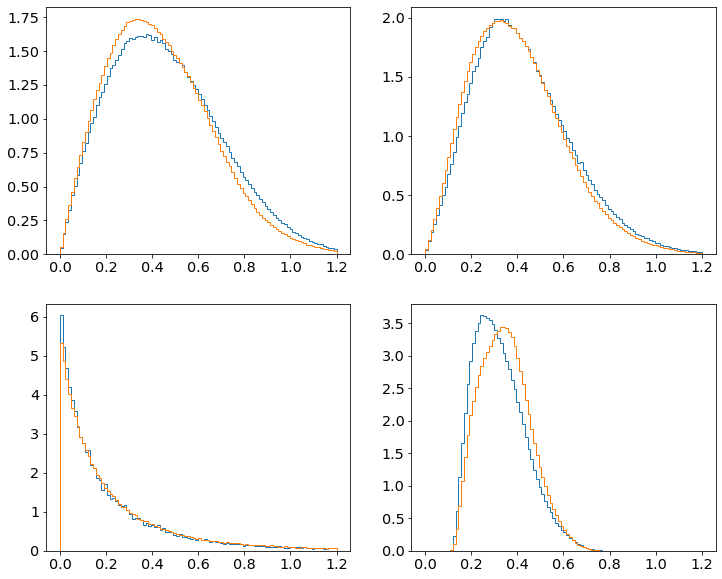

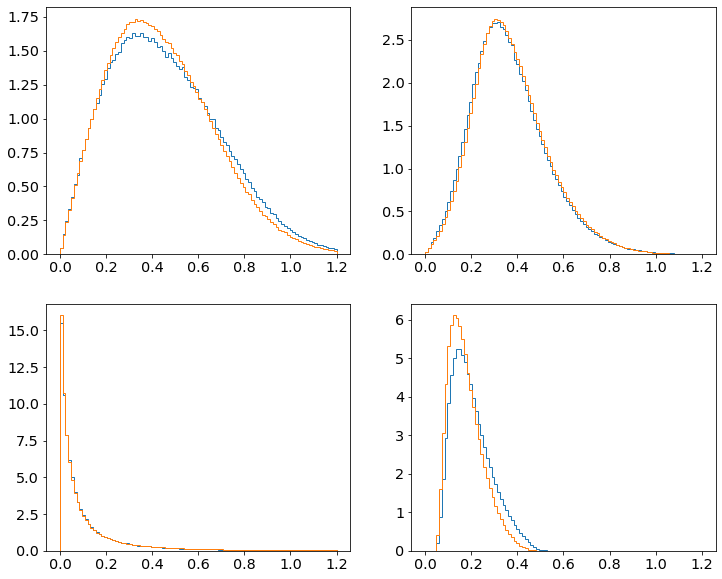

In [95]:

for q in 'h2_pid == 2212', 'abs(h2_pid) == 211':
    fig,axs = plt.subplots(2,2, figsize=(12,10))
    for df in data_dihadrons, mc_dihadrons:
        df = df.query(q)
        axs[0][0].hist(df.h1_cm_pt,density=True,bins=100, histtype='step',range=(0,1.2))
        axs[0][1].hist(df.h2_cm_pt,density=True,bins=100, histtype='step',range=(0,1.2))
        axs[1][0].hist(df.diff_rap_cm-df.diff_eta_cm,density=True,bins=100, histtype='step',range=(0,1.2))
        axs[1][1].hist(df.h2_z,density=True,bins=100, histtype='step',range=(0,1.2))


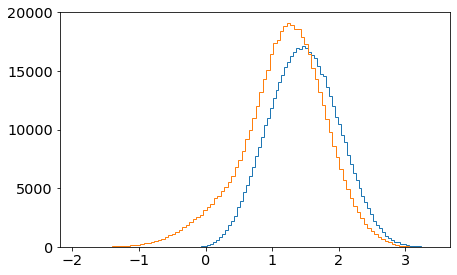

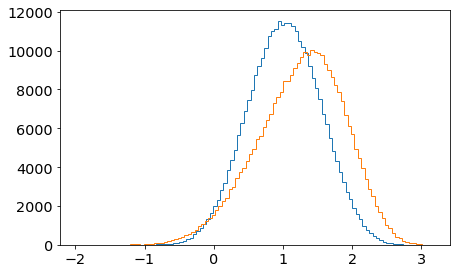

In [79]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
plt.hist(df.diff_rap_cm,bins=100,histtype='step')
plt.hist(df.mix_diff_rap,bins=100,histtype='step')
plt.show()
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211")
plt.hist(df.diff_rap_cm,bins=100,histtype='step')
plt.hist(df.mix_diff_rap,bins=100,histtype='step')
plt.show()

In [136]:
import misc_util

def azimuthalPlot(df,df_mixed, ntrig_real, ntrig_mixed, n=4,bins = 50, includeResiduals=False,includeLegend=True,style='normal',
                 normalize_properly=True,show='corr',frame='cm',truth=False):
    if(includeResiduals):
        fig,axs = plt.subplots(2,1, figsize=(7,7), gridspec_kw={'height_ratios': [3, 1]}, 
                              sharex='all')
        plt.sca(axs[0])
    x,y,dy = [],[],[]
    
    if frame == 'cm':
        diff_phi_shift = offset(df.diff_phi_cm)
        mix_diff_phi_shift = offset(df_mixed.diff_phi_cm)
    elif frame== 'lab':
        if not truth:
            diff_phi_shift = offset(df.diff_phi_lab)
            mix_diff_phi_shift = offset(df_mixed.diff_phi_lab)
        else:
            diff_phi_shift = df.diff_phi_shift_lab_truth
            mix_diff_phi_shift = df.query('mix_found > 0').mix_diff_phi_shift_lab_truth
    
    denom = ntrig_real*2*np.pi/bins
    y, x = np.histogram(diff_phi_shift, bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,denom)
    dy=np.divide(dy,denom)
    
    denom = ntrig_mixed*2*np.pi/bins
    ym, _ = np.histogram(mix_diff_phi_shift, bins=bins, range=(-np.pi/2,3*np.pi/2))
    dym = np.sqrt(ym)
    ym=np.divide(ym,denom)
    dym=np.divide(dym,denom)
    if show == 'corr':
        dy = y/ym*np.hypot(dy/y, dym/ym)
        y= y/ym
    elif show == 'mix':
        y=ym
        dy = dym
    
    
    if style== 'normal':
        plt.errorbar(x,y,dy,marker='o',color='k',linestyle='')
        plt.axhline(0,color='0.7',linestyle=':')
        #a = [2*sum(y*np.sin(i*x))/len(x) for i in range(0,n+1)]
        #remove sin term
        #a = [0 for i in range(0,n+1)]
        b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
        b[0]/=2
        s = 0
        for i in range(0,n+1):
            s = b[i]*np.cos(i*x)+s
        plt.plot(x,s,linestyle='-',color='k',label='all')
        for i in range(1,n+1):
            plt.plot(x,b[i]*np.cos(i*x)+b[0]*(i!=0),linestyle='--', label="n=%s"%i)
        plt.gca().set_xlim(-np.pi/2,np.pi*3/2)
        if show == 'same':
            plt.gca().set_ylabel("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN}{d\\Delta\\phi}$",rotation=0,fontsize=20,labelpad=25)
        elif show == 'corr' :
            plt.gca().set_ylabel("$C(\\Delta\\phi)$",rotation=0,fontsize=20,labelpad=25)
        elif show == 'mix' :
            plt.gca().set_ylabel("$\\frac{1}{N_{\\mathrm{trig}}}\\frac{dN^{\\mathrm{mix}}}{d\\Delta\\phi}$",rotation=0,fontsize=20,labelpad=25)
                
    elif style=='bar':
        plt.gca().bar(x,y,x[1]-x[0],alpha=0.3,color='tab:pink')
    if not includeResiduals:
        plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
    if includeLegend:
        legend = plt.gca().legend(title="Fourier fit",loc='upper left')
        plt.setp(legend.get_title(),fontsize=12)
    if includeResiduals:
        plt.sca(axs[1])
        plt.errorbar(x,(y-s)/dy,1,marker='o',color='k',linestyle='')
        plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
        axs[1].set_ylabel('normed residual')
        #lims = axs[0].get_ylim()
        #axs[1].set_ylim(-(lims[1]-lims[0])/6,(lims[1]-lims[0])/6)
        plt.sca(axs[0])
        plt.subplots_adjust(hspace=0)

In [153]:
def azimuthalPlot_3(df_real,df_mixed,ntrig_real, ntrig_mixed,n=4,bins = 50, includeResiduals=False,includeLegend=True,style='normal',
                 normalize_properly=True,frame='cm',truth=False):
    fig,axs = plt.subplots(1,3, figsize=(18,6))
    plt.sca(axs[0])
    azimuthalPlot(df_real,df_mixed,ntrig_real, ntrig_mixed,n,bins,includeLegend=True,show='same',frame=frame,truth=truth)
    plt.sca(axs[1])
    axs[0].get_shared_y_axes().join(axs[0], axs[1])
    azimuthalPlot(df_real,df_mixed,ntrig_real, ntrig_mixed, n,bins,includeLegend=False,show='mix',frame=frame,truth=truth)
    plt.sca(axs[2])
    azimuthalPlot(df_real,df_mixed,ntrig_real, ntrig_mixed, n,bins,includeLegend=False,show='corr',frame=frame,truth=truth)
    fig.subplots_adjust(wspace=0.4)
    return fig, axs

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 315514., 301028., 286118., 274175., 259918., 248240.,
        236777., 226403., 217260., 206886., 197862., 190165., 182365.,
        175013., 167416., 161653., 155499., 149685., 143933., 139040.,
        134014., 129623., 125141., 120587., 116746., 113333., 109739.,
        106323., 102707.,  99321.,  95848.,  92367.,  89319.,  86488.,
         83890.,  81859.,  78960.,  76757.,  74390.,  72088.,  70605.,
         67606.,  65856.,  63056.,  61405.,  60235.,  59230.,  55958.,
      

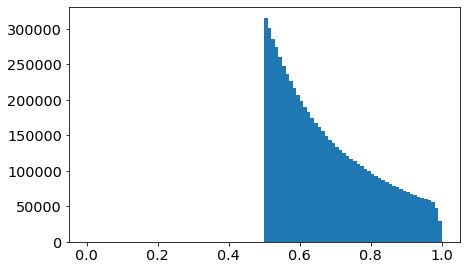

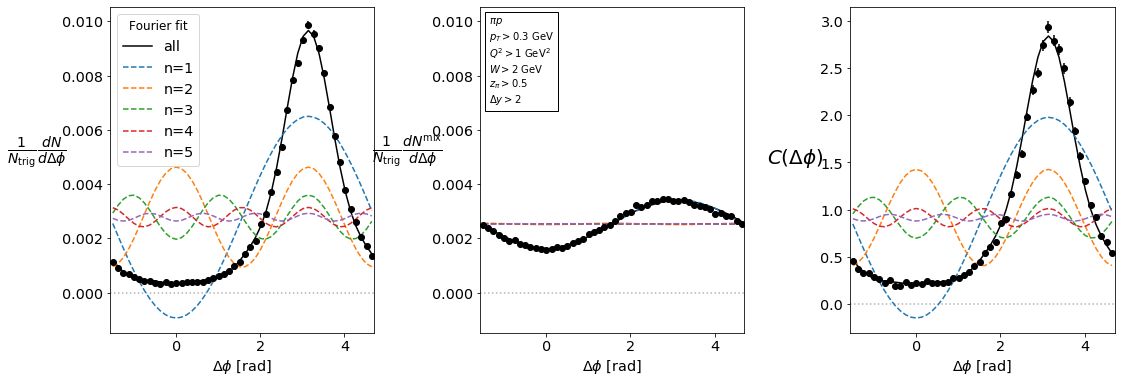

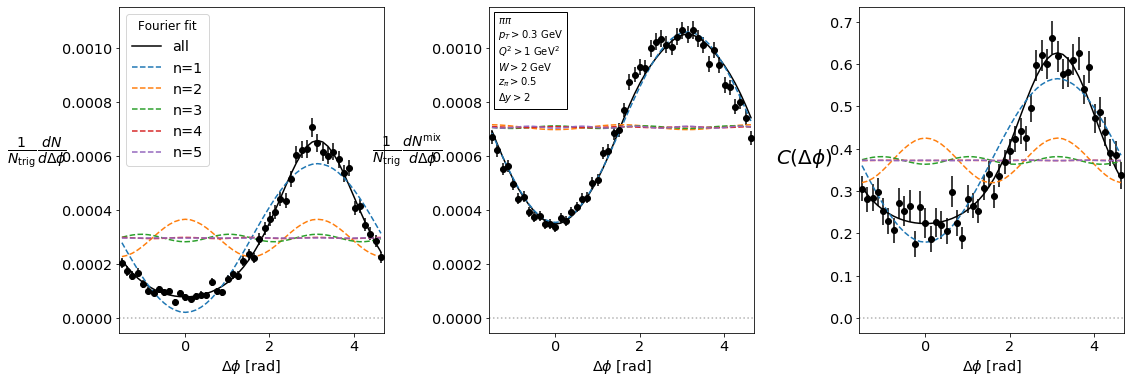

In [172]:
#cm frame

df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3 and diff_rap_cm>2"\
                         + "and h2_pid == 2212")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3 and diff_rap_cm>2"\
                         + "and h2_pid == 2212")
ntrig_mixed = len(mixed.query("h1_cm_pt>0.3"))
ntrig_real = len(data_triggers.query("h_cm_pt>0.3"))

fig,axs = azimuthalPlot_3(df,df_mixed, ntrig_real, ntrig_mixed,n=5)
axs[1].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$\n$\\Delta y>2$",loc='upper left'))
plt.savefig("../images/corr_1d_pi_p.pdf")
plt.show()

df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3 and diff_rap_cm>2"\
                         + "and abs(h2_pid) == 211")
df_mixed = mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3 and diff_rap_cm>2"\
                         + "and abs(h2_pid) == 211")

fig,axs = azimuthalPlot_3(df,df_mixed,ntrig_real,ntrig_mixed,n=5)
axs[1].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$\n$\\Delta y>2$",loc='upper left'))
plt.savefig("../images/corr_1d_pi_pi.pdf")
plt.show()

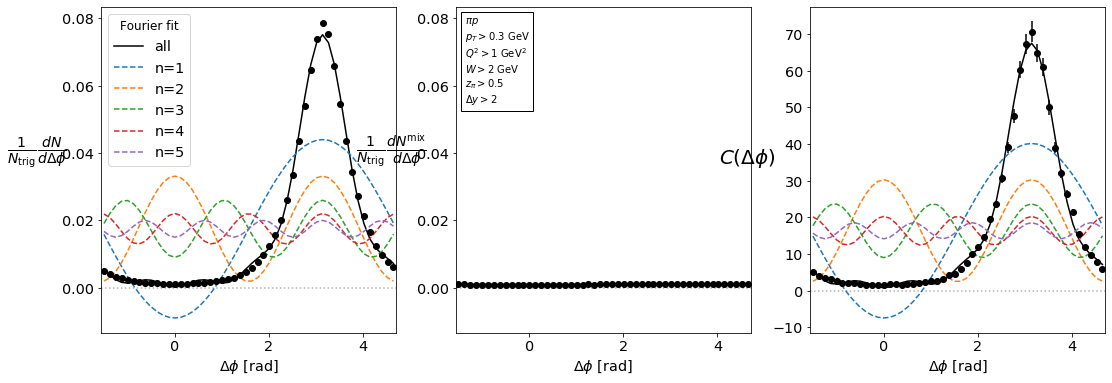

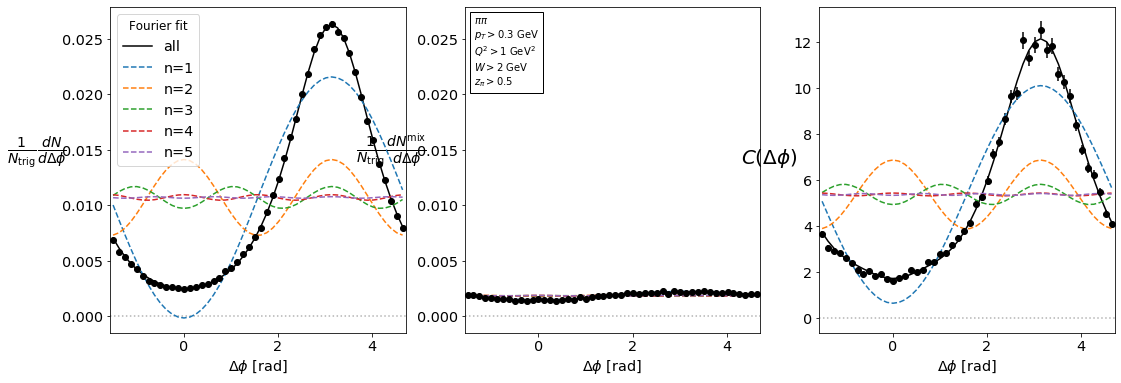

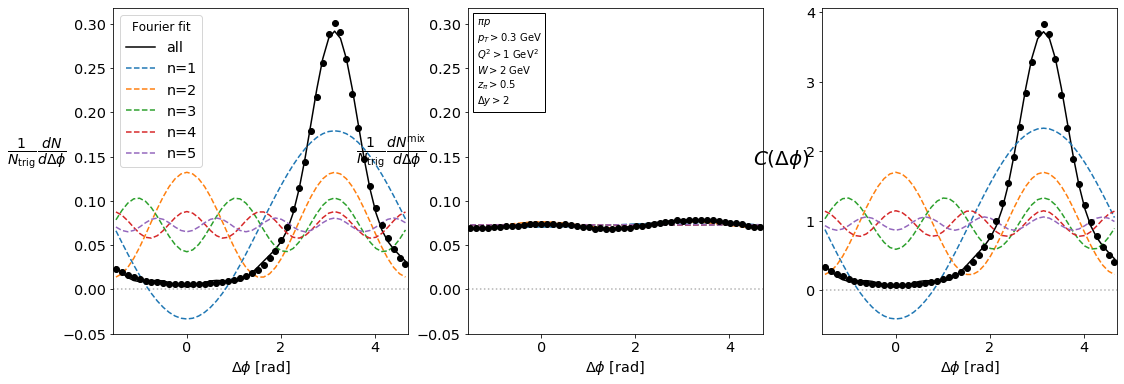

In [27]:
#cm frame  (MC)
df = mc_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
fig,axs = azimuthalPlot_3(df,df_trig,n=5)
axs[1].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$\n$\\Delta y>2$",loc='upper left'))
plt.show()


MC RECON


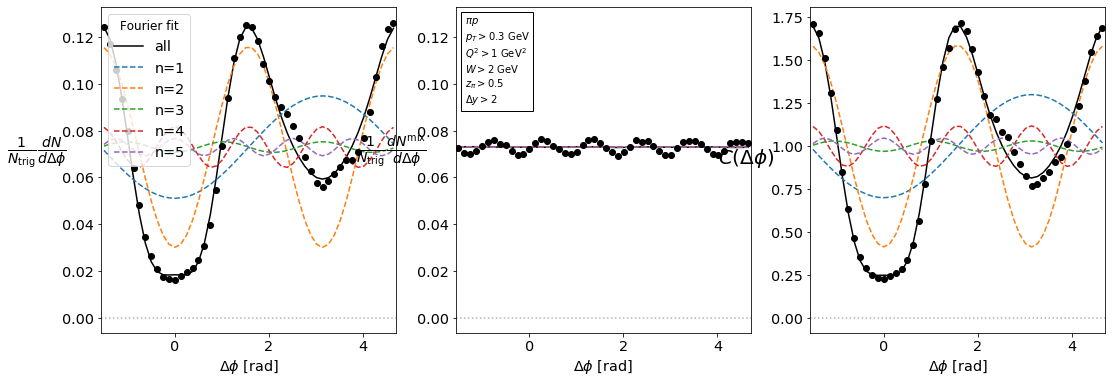

MC TRUTH


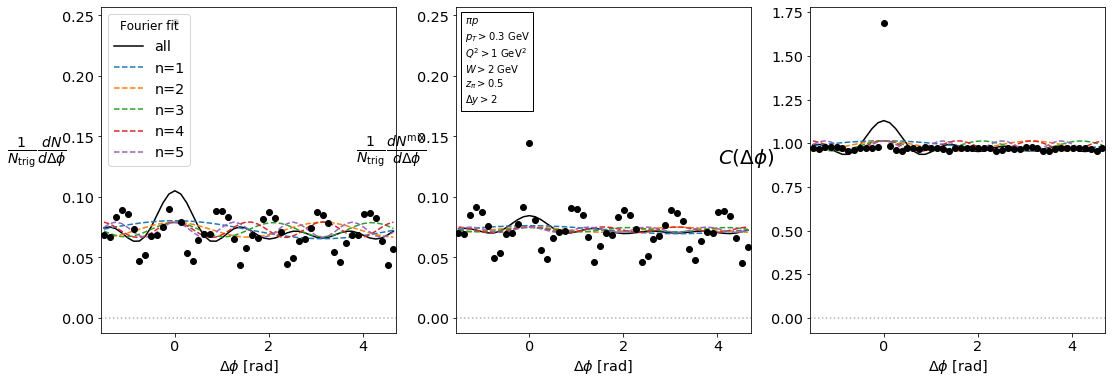

In [28]:
#lab frame MC
print("MC RECON")
df = mc_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
fig,axs = azimuthalPlot_3(df,df_trig,n=5,frame='lab')
axs[1].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$\n$\\Delta y>2$",loc='upper left'))
plt.show()
#lab frame MC TRUTH

print("MC TRUTH")
df = mc_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
fig,axs = azimuthalPlot_3(df,df_trig,n=5,frame='lab',truth=True)
axs[1].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$\n$\\Delta y>2$",loc='upper left'))
plt.show()

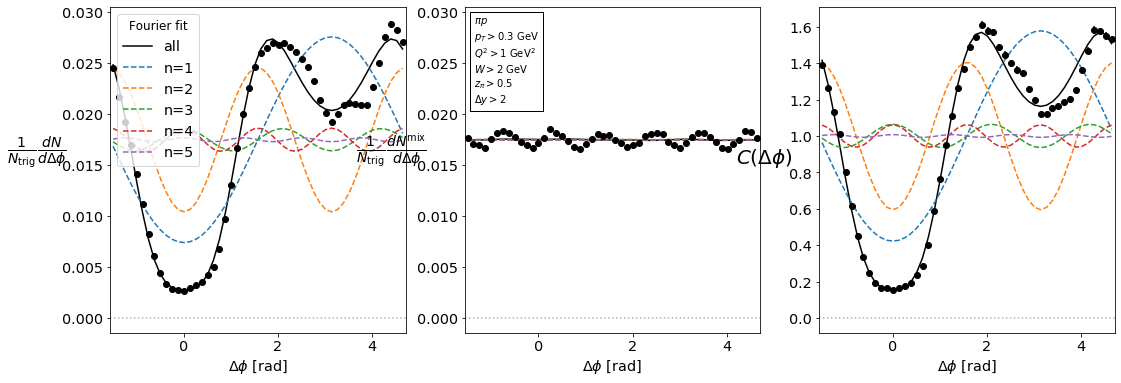

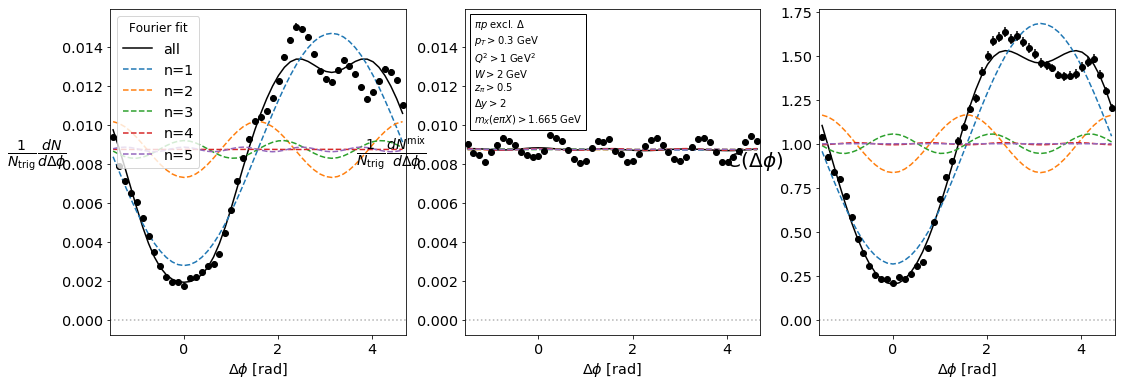

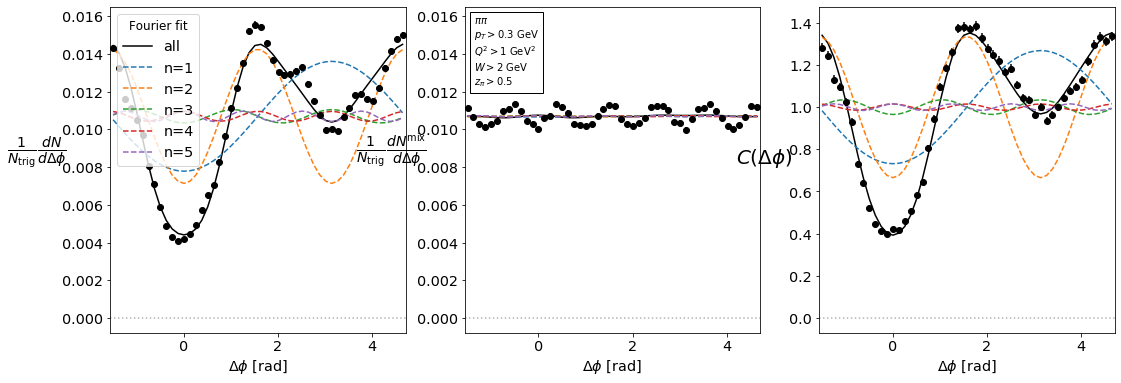

In [29]:
#lab frame
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212")
fig,axs = azimuthalPlot_3(df,df_trig,n=5,frame='lab')
axs[1].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$\n$\\Delta y>2$",loc='upper left'))
plt.show()

df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212 and mx_eh1x > 1.665")
fig,axs = azimuthalPlot_3(df,df_trig,n=5,frame='lab')
axs[1].add_artist(AnchoredText("$\pi p$ excl. $\Delta$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$\n$\\Delta y>2$\n$m_X(e\\pi X)> 1.665$ GeV",loc='upper left'))
plt.show()

df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211")
fig,axs = azimuthalPlot_3(df,df_trig,n=5,frame='lab')
axs[1].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.show()

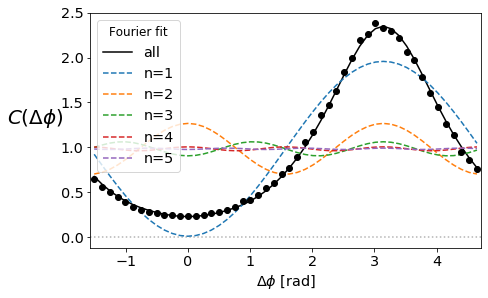

In [96]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211")
azimuthalPlot(df,df_trig,n=5)

<ipython-input-24-e7abf3efcec0>:34: RuntimeWarning: invalid value encountered in true_divide
  dy = y/ym*np.hypot(dy/y, dym/ym)
<ipython-input-24-e7abf3efcec0>:35: RuntimeWarning: invalid value encountered in true_divide
  y= y/ym


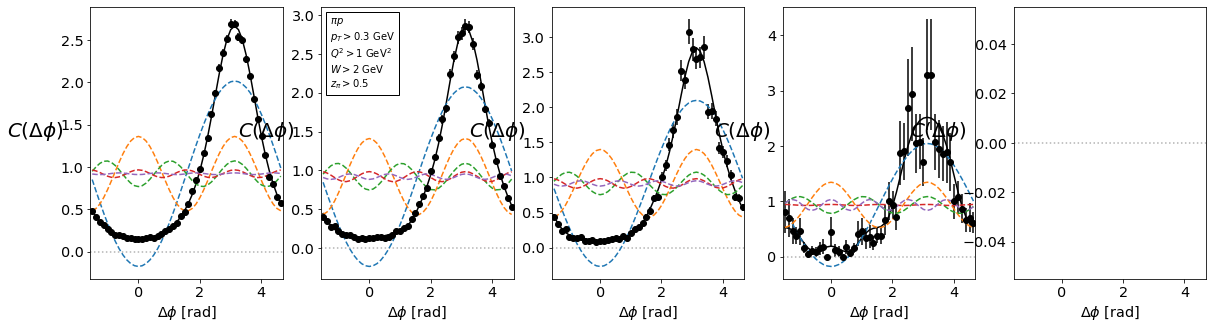

In [30]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 2212 and mx_eh1x >1.665")

partitions = [0.5, 0.6,0.7,0.8,0.9,1.0]
fig,axs = plt.subplots(1,len(partitions)-1,figsize=(20,5))
for i, (mn,mx) in enumerate(zip(partitions[:-1],partitions[1:])):
    dfbin = df.query('h1_z>%s and h1_z<%s'%(mn,mx))
    plt.sca(axs[i])
    azimuthalPlot(dfbin,df_trig,n=5,show='corr',includeLegend=False)
axs[1].add_artist(AnchoredText("$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.show()
            

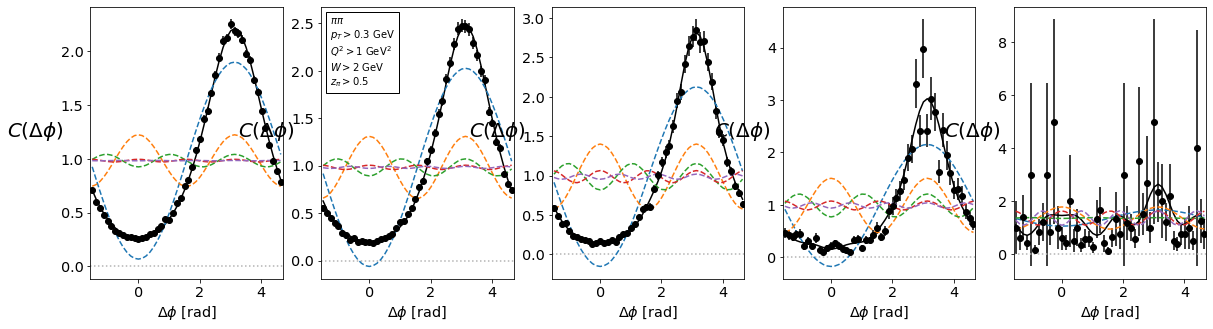

In [123]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and abs(h2_pid) == 211")

partitions = [0.5, 0.6,0.7,0.8,0.9,1.0]
fig,axs = plt.subplots(1,len(partitions)-1,figsize=(20,5))
for i, (mn,mx) in enumerate(zip(partitions[:-1],partitions[1:])):
    dfbin = df.query('h1_z>%s and h1_z<%s'%(mn,mx))
    plt.sca(axs[i])
    azimuthalPlot(dfbin,df_trig,n=5,show='corr',includeLegend=False)
axs[1].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.show()

<ipython-input-107-86d04697ff2b>:24: RuntimeWarning: invalid value encountered in true_divide
  dy = y/ym*np.hypot(dy/y, dym/ym)
<ipython-input-107-86d04697ff2b>:24: RuntimeWarning: divide by zero encountered in true_divide
  dy = y/ym*np.hypot(dy/y, dym/ym)
<ipython-input-107-86d04697ff2b>:25: RuntimeWarning: divide by zero encountered in true_divide
  y= y/ym
<ipython-input-107-86d04697ff2b>:37: RuntimeWarning: invalid value encountered in double_scalars
  b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]


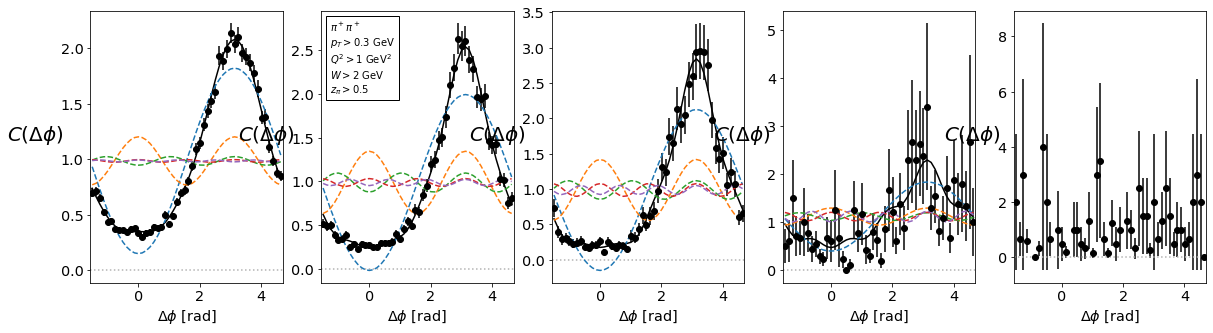

In [124]:
df = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
                         + "and h2_pid == 211 and h1_pid == 211")

partitions = [0.5, 0.6,0.7,0.8,0.9,1.0]
fig,axs = plt.subplots(1,len(partitions)-1,figsize=(20,5))
for i, (mn,mx) in enumerate(zip(partitions[:-1],partitions[1:])):
    dfbin = df.query('h1_z>%s and h1_z<%s'%(mn,mx))
    plt.sca(axs[i])
    azimuthalPlot(dfbin,df_trig,n=5,show='corr',includeLegend=False)
axs[1].add_artist(AnchoredText("$\pi^+\pi^+$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_\\pi>0.5$",loc='upper left'))
plt.show()

(array([      0.,       0.,       0.,       0.,       0., 1672821.,
              0.,       0.,       0.,       0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

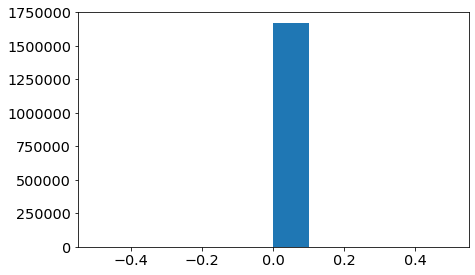

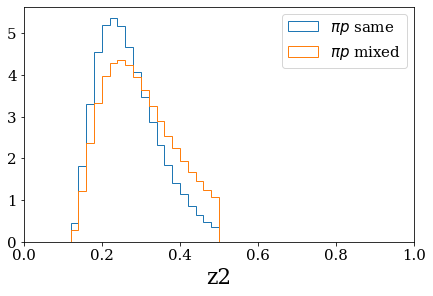

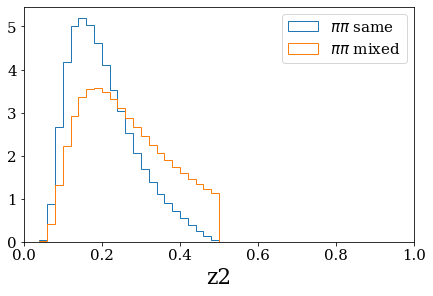

In [478]:
plt.hist(pi_p_mXcut.h2_z,bins=100,histtype='step',density=True,range=(0,2),label='$\pi p$ same')
plt.hist(pi_p_mXcut_mixed.h2_z,bins=100,histtype='step',density=True,range=(0,2),label='$\pi p$ mixed')
plt.gca().set_xlim(0,1)
plt.gca().set_xlabel("z2")
plt.legend()
plt.savefig("../images/z2_pi_p.pdf",bbox_inches='tight')
plt.show()
plt.hist(pi_pi.h2_z,bins=100,histtype='step',density=True,range=(0,2),label='$\pi\pi$ same')
plt.hist(pi_pi_mixed.h2_z,bins=100,histtype='step',density=True,range=(0,2),label='$\pi \pi$ mixed')
plt.gca().set_xlim(0,1)
plt.gca().set_xlabel("z2")
plt.legend()
plt.savefig("../images/z2_pi_pi.pdf",bbox_inches='tight')
plt.show()

In [ ]:
plt.hist(pi_p.h2_z,bins=100,histtype='step',density=True)
plt.hist(pi_p_mixed.h2_z,bins=100,histtype='step',density=True)